# 1. Import Libraries and Load Data

In [1]:
# Tested with:
# Python 3.12.4
# pandas==2.2.2
# numpy==1.26.4

# Import necessary libraries 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib.cm as cm
from collections import Counter, defaultdict
from matplotlib.ticker import PercentFormatter
from pathlib import Path
import statistics as stats
import copy
import hashlib
import random
import math
import sys
import time
import re

# Set a global random seed for reproducibility
RNG_SEED = 42
random.seed(RNG_SEED)
np.random.seed(RNG_SEED)

In [2]:
# Load student, project, and professor datasets
student_df = pd.read_excel("student.xlsx")
project_df = pd.read_excel("project.xlsx")
supervisor_df = pd.read_excel("supervisor.xlsx")

# 2. Explortory Data Analysis

In [3]:
# Display student dataset shape
print("Student dataset shape:", student_df.shape)

# Count unique students
print("Number of unique students:", student_df["Student ID"].nunique())

# Preview first 10 rows of student dataset
student_df.head(10)

Student dataset shape: (100, 13)
Number of unique students: 100


,Student ID,Student Name,COURSE001,COURSE002,COURSE003,Average,Client-based Eligibility,Preference 1,Preference 2,Preference 3,Preference 4,Preference 5,Preference 6
0,ST1001,S1,68,74,62,66,False,P020,P033,P002,P017,P005,P036
1,ST1002,S2,71,73,73,75,False,P022,P012,P009,P028,P015,P001
2,ST1003,S3,69,66,72,67,False,P008,P013,P046,P012,P025,P030
3,ST1004,S4,77,65,69,69,False,P037,P038,P023,P031,P033,P040
4,ST1005,S5,49,68,63,62,False,P020,P037,P001,P005,P022,NaN
5,ST1006,S6,77,56,74,64,False,P032,P030,P012,P042,P011,P018
6,ST1007,S7,74,67,78,71,True,P006,P011,P050,P045,P012,P035
7,ST1008,S8,68,70,71,67,False,P009,P002,P014,P017,P047,NaN
8,ST1009,S9,63,60,70,66,False,P012,P033,P037,P030,P001,P005
9,ST1010,S10,71,58,67,69,False,P029,NaN,NaN,NaN,NaN,NaN


In [4]:
# Show info for student dataset
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Student ID                100 non-null    object
 1   Student Name              100 non-null    object
 2   COURSE001                 100 non-null    int64 
 3   COURSE002                 100 non-null    int64 
 4   COURSE003                 100 non-null    int64 
 5   Average                   100 non-null    int64 
 6   Client-based Eligibility  100 non-null    bool  
 7   Preference 1              100 non-null    object
 8   Preference 2              94 non-null     object
 9   Preference 3              94 non-null     object
 10  Preference 4              91 non-null     object
 11  Preference 5              83 non-null     object
 12  Preference 6              71 non-null     object
dtypes: bool(1), int64(4), object(8)
memory usage: 9.6+ KB


In [5]:
# Display project dataset shape
print("Project dataset shape:", project_df.shape)

# Count unique projects
print("Number of unique projects:", project_df["Project ID"].nunique())

# Preview first 10 rows of project dataset
project_df.head(10)

Project dataset shape: (50, 9)
Number of unique projects: 50


,Project ID,Project Title,Supervisor ID,Project Type,Min No. of Students,Max No. of Students,Pre-requisites,Minimum Average Achieved,Second Marker
0,P001,PROJECT 1,PFR115,Research-based,0,2,COURSE001>=65,60,"PFR126,PFR110,PFR129,PFR119"
1,P002,PROJECT 2,PFR122,Research-based,0,2,NaN,0,"PFR107,PFR119,PFR106"
2,P003,PROJECT 3,PFR127,Research-based,0,1,NaN,50,"PFR110,PFR116,PFR128"
3,P004,PROJECT 4,PFR110,Research-based,1,3,(COURSE001>=50 AND COURSE002>=50) OR (COURSE00...,50,"PFR105,PFR113,PFR119,PFR130,PFR120"
4,P005,PROJECT 5,PFR125,Research-based,0,1,COURSE001>=70,60,"PFR122,PFR123,PFR101,PFR113,PFR114"
5,P006,PROJECT 6,PFR129,Client-based,2,4,NaN,50,"PFR128,PFR111,PFR105"
6,P007,PROJECT 7,PFR101,Research-based,0,2,COURSE001>=50 AND COURSE002>=65,60,"PFR104,PFR109,PFR113,PFR107,PFR112"
7,P008,PROJECT 8,PFR128,Research-based,0,3,COURSE002>=60,0,"PFR114,PFR116,PFR127,PFR104"
8,P009,PROJECT 9,PFR122,Research-based,0,2,NaN,65,"PFR117,PFR119,PFR101"
9,P010,PROJECT 10,PFR107,Student-sourced,1,1,NaN,0,"PFR102,PFR123,PFR106,PFR130"


In [6]:
# Show info for project dataset
project_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Project ID                50 non-null     object
 1   Project Title             50 non-null     object
 2   Supervisor ID             50 non-null     object
 3   Project Type              50 non-null     object
 4   Min No. of Students       50 non-null     int64 
 5   Max No. of Students       50 non-null     int64 
 6   Pre-requisites            22 non-null     object
 7   Minimum Average Achieved  50 non-null     int64 
 8   Second Marker             50 non-null     object
dtypes: int64(3), object(6)
memory usage: 3.6+ KB


In [7]:
# Display supervisor dataset shape
print("Supervisor dataset shape:", supervisor_df.shape)

# Count unique supervisors
print("Number of unique supervisors:", supervisor_df["Supervisor ID"].nunique())

# Preview first 10 rows of supervisor dataset
supervisor_df.head(10)

Supervisor dataset shape: (30, 4)
Number of unique supervisors: 30


,Supervisor ID,Supervisor Name,Minimum No. of Students,Maximum No. of Students
0,PFR101,P1,0,2
1,PFR102,P2,0,4
2,PFR103,P3,0,2
3,PFR104,P4,2,4
4,PFR105,P5,0,6
5,PFR106,P6,0,2
6,PFR107,P7,2,6
7,PFR108,P8,0,4
8,PFR109,P9,0,2
9,PFR110,P10,1,3


In [8]:
# Show info for supervisor dataset
supervisor_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Supervisor ID            30 non-null     object
 1   Supervisor Name          30 non-null     object
 2   Minimum No. of Students  30 non-null     int64 
 3   Maximum No. of Students  30 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.1+ KB


In [9]:
# Calculate total student capacity across all projects
total_project_capacity = project_df["Max No. of Students"].sum()
print(f"Total project capacity: {total_project_capacity}")

# Calculate total student capacity across all supervisors
total_supervisor_capacity = supervisor_df["Maximum No. of Students"].sum()
print(f"Total supervisor capacity: {total_supervisor_capacity}")

Total project capacity: 110
Total supervisor capacity: 110


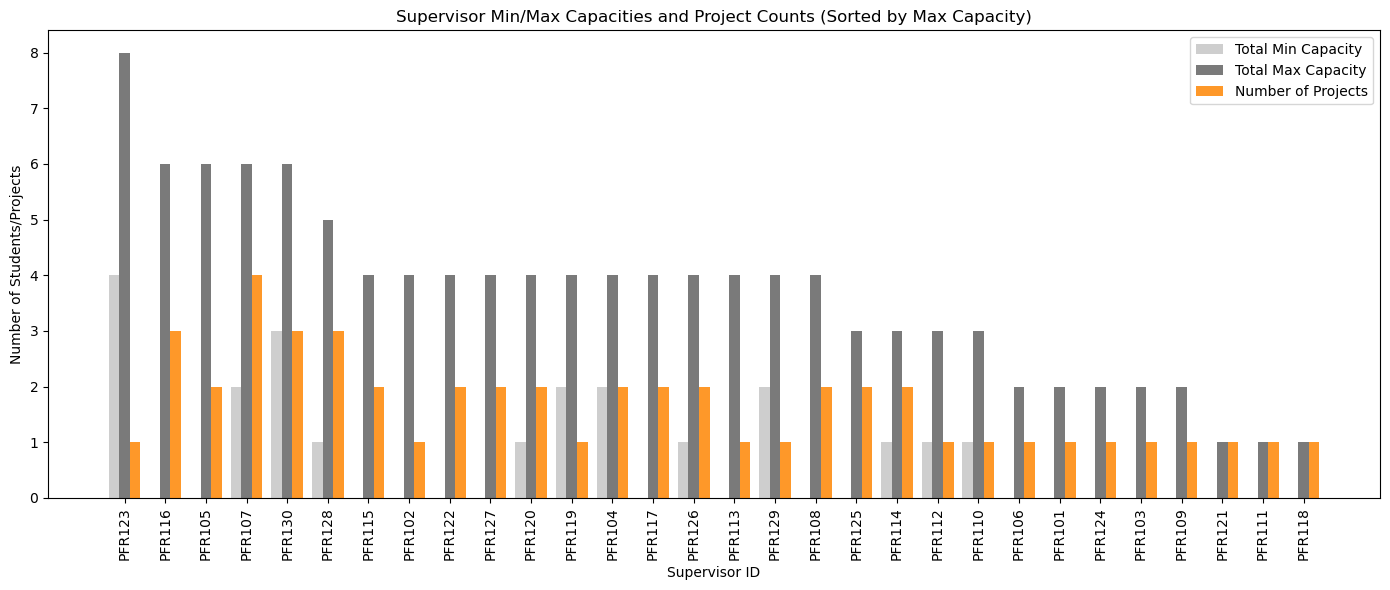

In [10]:
# Build an aggregated table including ALL supervisors
counts = project_df["Supervisor ID"].value_counts()
caps = project_df.groupby("Supervisor ID")[["Min No. of Students", "Max No. of Students"]].sum()

agg = (
    supervisor_df[["Supervisor ID"]]
    .merge(caps, on="Supervisor ID", how="left")
    .merge(counts.rename("Project Count"), on="Supervisor ID", how="left")
    .fillna(0)  
)

agg = agg.rename(columns={
    "Min No. of Students": "Total Min",
    "Max No. of Students": "Total Max"
})
agg[["Total Min", "Total Max", "Project Count"]] = agg[["Total Min", "Total Max", "Project Count"]].astype(int)

# Sort supervisors by max capacity
agg_sorted = agg.sort_values("Total Max", ascending=False).reset_index(drop=True)

# Colour settings
grays = plt.colormaps.get_cmap("Grays")
yellows   = plt.colormaps.get_cmap("YlOrBr")
min_color  = grays(0.30)   
max_color  = grays(0.60)     
proj_color = yellows(0.50)  

# Plot grouped bar chart
x = np.arange(len(agg_sorted))
w = 0.26
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - w, agg_sorted["Total Min"],  width=w, color=min_color, label="Total Min Capacity")
ax.bar(x,      agg_sorted["Total Max"], width=w, color=max_color, label="Total Max Capacity")
ax.bar(x + w,  agg_sorted["Project Count"], width=w, color=proj_color, label="Number of Projects")
ax.set_xticks(x)
ax.set_xticklabels(agg_sorted["Supervisor ID"], rotation=90)
ax.set_title("Supervisor Min/Max Capacities and Project Counts (Sorted by Max Capacity)")
ax.set_ylabel("Number of Students/Projects")
plt.xlabel("Supervisor ID")
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [11]:
# Generate table showing the number of projects for each project type
project_type_distribution = (
    project_df["Project Type"]
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Project Type", "Project Type": "Number of Projects"})
)
display(project_type_distribution)

,Number of Projects,count
0,Research-based,41
1,Student-sourced,6
2,Client-based,3


In [12]:
# Create table showing count of projects with and without prerequisites
prereq_counts = (
    project_df["Pre-requisites"]
    .notna()
    .value_counts()
    .rename({True: "Has Prerequisite", False: "No Prerequisite"})
    .reset_index()
    .rename(columns={"index": "Prerequisite Status", "Pre-requisites": "Number of Projects"})
)
display(prereq_counts)

# Remove NaN values before counting unique prerequisites
unique_prereqs = project_df["Pre-requisites"].dropna().unique()
display(pd.DataFrame({"Metric": ["Number of different prerequisites"], "Value": [len(unique_prereqs)]}))

# Create table showing the frequency of each prerequisite (excluding NaN)
prereq_counts = (
    project_df["Pre-requisites"]
    .value_counts(dropna=True)
    .reset_index()
    .rename(columns={"index": "Pre-requisite", "Pre-requisites": "Number of Projects"})
)
display(prereq_counts)

,Number of Projects,count
0,No Prerequisite,28
1,Has Prerequisite,22


,Metric,Value
0,Number of different prerequisites,16


,Number of Projects,count
0,COURSE001>=65,3
1,COURSE001>=70,2
2,COURSE002>=60,2
3,COURSE002>=65,2
4,COURSE003>=70,2
5,(COURSE001>=50 AND COURSE002>=50) OR (COURSE00...,1
6,COURSE001>=50 AND COURSE002>=65,1
7,COURSE001>=50 AND COURSE002>=50 AND COURSE003>=50,1
8,COURSE001>=50 AND COURSE003>=50,1
9,COURSE001>=60,1


In [13]:
# Create table showing the distribution of minimum average achieved values across projects
min_avg_dist = (
    project_df["Minimum Average Achieved"]
    .value_counts()
    .sort_index()
    .reset_index()
    .rename(columns={"index": "Minimum Average Achieved", "count": "Number of Projects"})
)
display(min_avg_dist)

,Minimum Average Achieved,Number of Projects
0,0,24
1,50,6
2,60,14
3,65,6


In [14]:
# Calculate the distribution of the number of second markers assigned per project
num_markers_per_project = (
    project_df["Second Marker"]
    .str.split(",")
    .apply(len)
    .value_counts()
    .sort_index()
    .reset_index()
)
num_markers_per_project.columns = ["Number of Second Markers", "Number of Projects"]
display(num_markers_per_project)

,Number of Second Markers,Number of Projects
0,3,17
1,4,16
2,5,17


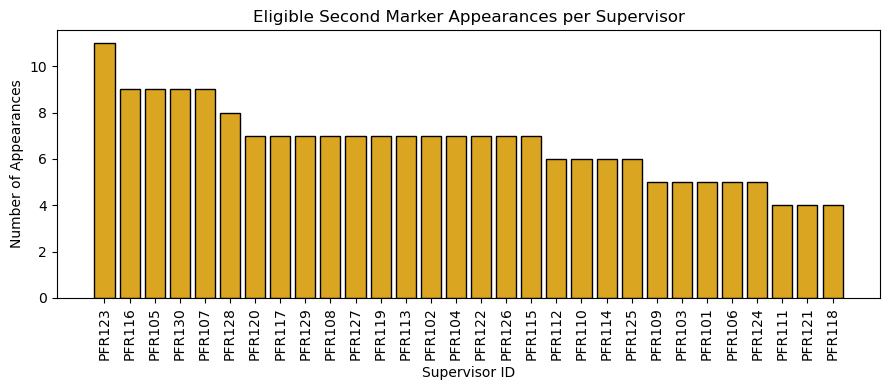

In [15]:
# Count second marker assignments per supervisor 
second_marker_series = (
    project_df["Second Marker"]
    .dropna()
    .str.split(",")
    .explode()
    .str.strip()
)
second_marker_counts = (
    second_marker_series.value_counts()
    .reset_index()
    .rename(columns={"index": "Supervisor ID", "Second Marker": "Supervisor ID", "count": "Second-Marker Assignments"})
    .sort_values("Second-Marker Assignments", ascending=False)
)

# Plot bar chart
plt.figure(figsize=(9, 4))
plt.bar(
    second_marker_counts["Supervisor ID"],
    second_marker_counts["Second-Marker Assignments"],   # keep variable name
    color="goldenrod", edgecolor="black"
)
plt.title("Eligible Second Marker Appearances per Supervisor")
plt.xlabel("Supervisor ID")
plt.ylabel("Number of Appearances")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
# Summarise descriptive statistics for key course grades and the overall average
course_stats = student_df[["COURSE001", "COURSE002", "COURSE003", "Average"]].describe()
display(course_stats)

,COURSE001,COURSE002,COURSE003,Average
count,100.000000,100.000000,100.000000,100.000000
mean,66.390000,62.110000,67.280000,65.200000
std,8.603376,7.646079,7.621183,5.297226
min,44.000000,41.000000,45.000000,54.000000
25%,63.000000,58.000000,64.750000,60.750000
50%,68.000000,62.500000,69.000000,65.500000
75%,72.000000,68.000000,71.000000,69.000000
max,87.000000,74.000000,82.000000,77.000000


In [17]:
# Count the number of students by client-based eligibility status
eligibility_counts = student_df["Client-based Eligibility"].value_counts().reset_index()
eligibility_counts.columns = ["Client-based Eligibility", "Number of Students"]
display(eligibility_counts)

,Client-based Eligibility,Number of Students
0,False,79
1,True,21


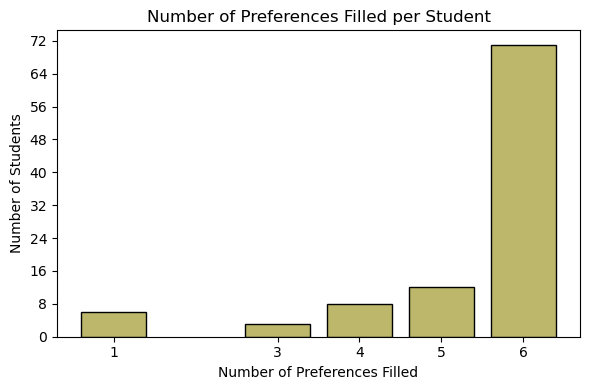

In [18]:
# Count how many preferences each student has filled
pref_cols = [f"Preference {i}" for i in range(1, 7)]
prefs_filled = (
    student_df[pref_cols]
    .notna()
    .sum(axis=1)
    .value_counts()
    .reset_index()
    .rename(columns={"index": "Number of Preferences Filled", "count": "Number of Students"})
    .sort_values("Number of Preferences Filled")
    .reset_index(drop=True)
)

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(prefs_filled["Number of Preferences Filled"], prefs_filled["Number of Students"], color="darkkhaki", edgecolor="black")
plt.title("Number of Preferences Filled per Student")
plt.xlabel("Number of Preferences Filled")
plt.ylabel("Number of Students")
plt.xticks(prefs_filled["Number of Preferences Filled"])
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))
plt.tight_layout()
plt.show()

C:\Users\denas\AppData\Local\Temp\ipykernel_68604\3965511837.py:26: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Oranges", 6)


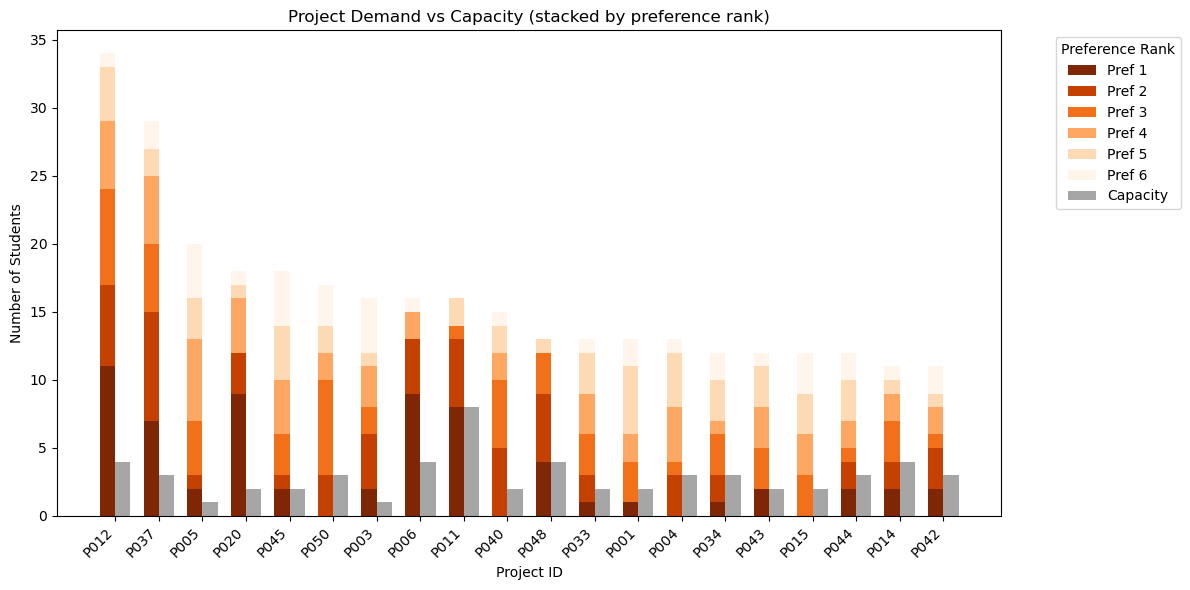

In [19]:
# Reshape student preferences into long format
pref_cols = [f"Preference {i}" for i in range(1, 7)]
prefs_long = student_df.melt(id_vars=["Student ID"], value_vars=pref_cols,
                             var_name="Preference Order", value_name="Project ID").dropna()
prefs_long["Preference Rank"] = prefs_long["Preference Order"].str.extract(r'(\d+)').astype(int)

# Collect project capacities
proj_cap = project_df[["Project ID", "Max No. of Students"]].set_index("Project ID")["Max No. of Students"]

# Count demand per project and preference rank
demand_pref = prefs_long.groupby(["Project ID", "Preference Rank"]).size().unstack(fill_value=0)

# Add total demand and join project capacity
demand_pref["Total Demand"] = demand_pref.sum(axis=1)
demand_pref = demand_pref.join(proj_cap, how="left").rename(columns={"Max No. of Students": "Capacity"})

# Keep the top projects by demand
top_projects = demand_pref.sort_values("Total Demand", ascending=False).head(20)

# Plot stacked demand vs capacity for each project
x = np.arange(len(top_projects))
w = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

# Use red shades for preferences (darker = stronger preference)
cmap = cm.get_cmap("Oranges", 6)
bottoms = np.zeros(len(top_projects))
for i, rank in enumerate(range(1, 7)):
    vals = top_projects.get(rank, [0]*len(top_projects))
    ax.bar(x - w/2, vals, bottom=bottoms, width=w,
           label=f"Pref {rank}", color=cmap(6 - rank))
    bottoms += vals

# Add capacity bars beside demand
ax.bar(x + w/2, top_projects["Capacity"], width=w, label="Capacity",
       color="grey", alpha=0.7, edgecolor="none")

# Plot bar chart
ax.set_xticks(x)
ax.set_xticklabels(top_projects.index, rotation=45, ha="right")
ax.set_ylabel("Number of Students")
ax.set_xlabel("Project ID")
ax.set_title("Project Demand vs Capacity (stacked by preference rank)")
ax.legend(title="Preference Rank", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

C:\Users\denas\AppData\Local\Temp\ipykernel_68604\3625259640.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("Oranges", 6)


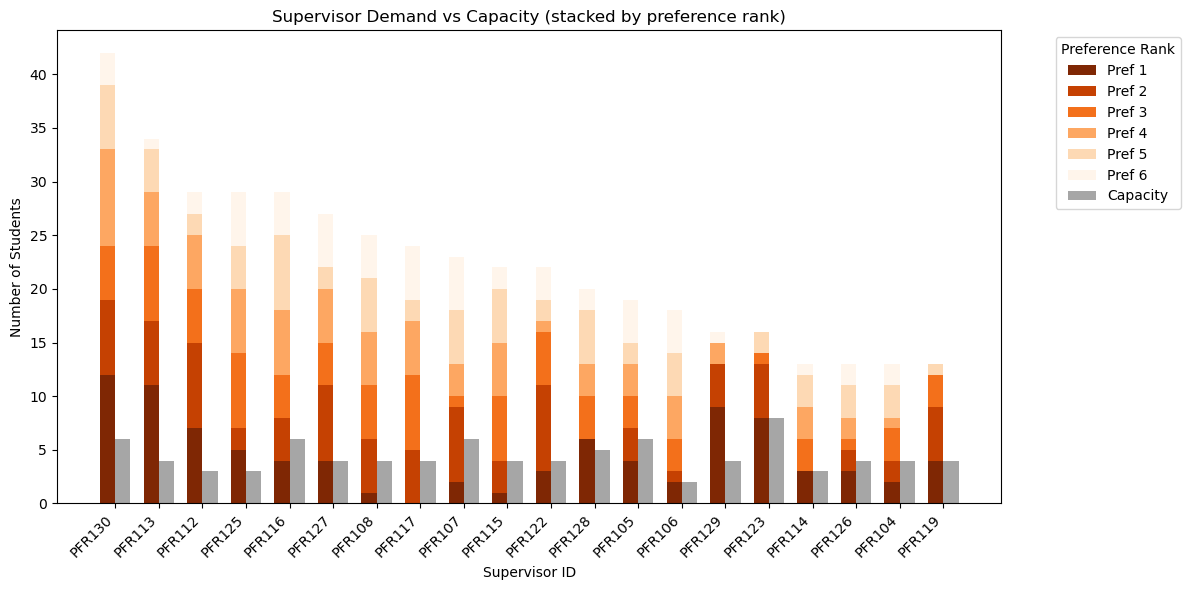

In [20]:
# Reshape student preferences into long format
pref_cols = [f"Preference {i}" for i in range(1, 7)]
prefs_long = student_df.melt(id_vars=["Student ID"], value_vars=pref_cols,
                             var_name="Preference Order", value_name="Project ID").dropna()
prefs_long["Preference Rank"] = prefs_long["Preference Order"].str.extract(r'(\d+)').astype(int)
prefs_long["Project ID"] = prefs_long["Project ID"].astype(str).str.strip()

# Map projects to supervisors and calculate each supervisor’s total capacity
super_col = "Supervisor ID" if "Supervisor ID" in project_df.columns else "Professor ID"
proj_super = project_df[["Project ID", super_col, "Max No. of Students"]].copy()
proj_super["Project ID"] = proj_super["Project ID"].astype(str).str.strip()
proj_super.rename(columns={super_col: "Supervisor ID"}, inplace=True)
supervisor_capacity = proj_super.groupby("Supervisor ID")["Max No. of Students"].sum()

# Merge preferences with supervisors and count demand per preference rank
merged = prefs_long.merge(proj_super[["Project ID", "Supervisor ID"]], on="Project ID", how="left")
demand_pref = merged.groupby(["Supervisor ID", "Preference Rank"]).size().unstack(fill_value=0)

# Add total demand and join supervisor capacity
demand_pref["Total Demand"] = demand_pref.sum(axis=1)
demand_pref = demand_pref.join(supervisor_capacity.rename("Capacity"), how="left")

# Keep the top supervisors by demand
top_supervisors = demand_pref.sort_values("Total Demand", ascending=False).head(20)

# Plot stacked demand vs capacity for each supervisor
x = np.arange(len(top_supervisors))
w = 0.35
fig, ax = plt.subplots(figsize=(12, 6))

# Use red shades for preferences (darker = stronger preference)
cmap = cm.get_cmap("Oranges", 6)
bottoms = np.zeros(len(top_supervisors))
for i, rank in enumerate(range(1, 7)):
    vals = top_supervisors.get(rank, [0]*len(top_supervisors))
    ax.bar(x - w/2, vals, bottom=bottoms, width=w,
           label=f"Pref {rank}", color=cmap(6 - rank))
    bottoms += vals

# Add capacity bars beside demand
ax.bar(x + w/2, top_supervisors["Capacity"], width=w, label="Capacity",
       color="grey", alpha=0.7, edgecolor="none")

# Plot bar chart
ax.set_xticks(x)
ax.set_xticklabels(top_supervisors.index.astype(str), rotation=45, ha="right")
ax.set_ylabel("Number of Students")
ax.set_xlabel("Supervisor ID")
ax.set_title("Supervisor Demand vs Capacity (stacked by preference rank)")
ax.legend(title="Preference Rank", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

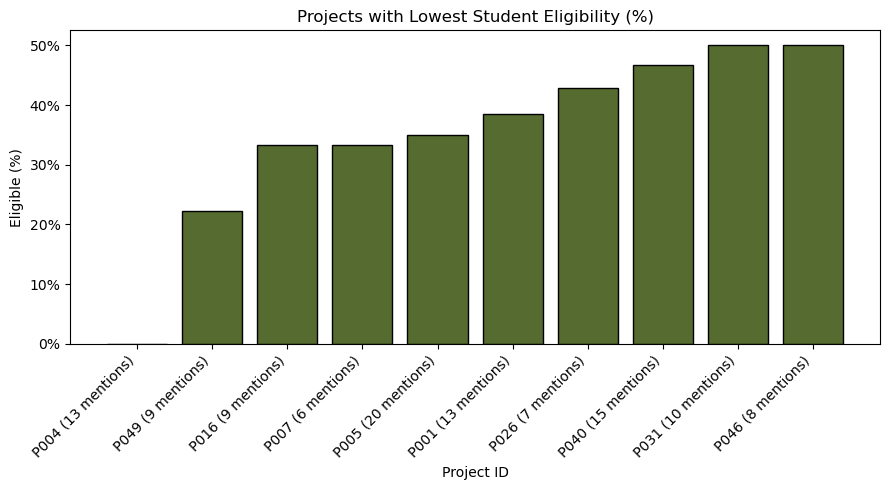

In [21]:
# Build student project preference pairs and attach project rules and student marks
pref_cols = [f"Preference {i}" for i in range(1, 7)]
prefs_long = student_df.melt(
    id_vars=["Student ID"], value_vars=pref_cols,
    var_name="Preference Order", value_name="Project ID"
).dropna()
prefs_elig = (
    prefs_long
    .merge(project_df[["Project ID", "Pre-requisites", "Minimum Average Achieved"]], on="Project ID", how="left")
    .merge(student_df[["Student ID", "COURSE001", "COURSE002", "COURSE003", "Average"]], on="Student ID", how="left")
)

# Standardise numerics (missing average thresholds treated as 0)
prefs_elig["Average"] = pd.to_numeric(prefs_elig["Average"], errors="coerce")
prefs_elig["Minimum Average Achieved"] = pd.to_numeric(
    prefs_elig["Minimum Average Achieved"], errors="coerce"
).fillna(0)

# Eligibility helpers (detect “no prerequisite” and parse rules)
def no_prereq(x):
    if pd.isna(x):
        return True
    s = str(x).strip().lower()
    return s in {"", "nan", "none", "null", "na", "-"}
cond_re = re.compile(r"^\s*(COURSE00[123])\s*>=\s*([0-9]+(?:\.[0-9]+)?)\s*$", re.IGNORECASE)

def meets_prereq_row(row):
    expr = row["Pre-requisites"]
    if no_prereq(expr):
        return True
    text = str(expr).upper()
    or_groups = re.split(r"\bOR\b", text)

    def group_ok(g):
        and_parts = re.split(r"\bAND\b", g)
        for p in and_parts:
            m = cond_re.match(p.strip())
            if not m:
                return False
            course, thr = m.group(1), float(m.group(2))
            if pd.isna(row[course]) or row[course] < thr:
                return False
        return True
    return any(group_ok(gr) for gr in or_groups)

# Mark each preference as eligible if average + prerequisites are satisfied
ok_avg = prefs_elig["Average"] >= prefs_elig["Minimum Average Achieved"]
ok_prereq = prefs_elig.apply(meets_prereq_row, axis=1)
prefs_elig["Eligible"] = ok_avg & ok_prereq

# Summarise eligibility by project, then take the 10 lowest-eligibility projects
elig_summary = (
    prefs_elig.groupby("Project ID")["Eligible"]
    .agg(TotalMentions="size", EligibleMentions="sum")
    .reset_index()
)
elig_summary["Eligible %"] = (
    100 * elig_summary["EligibleMentions"] / elig_summary["TotalMentions"]
).round(1)
bottom10 = (
    elig_summary.sort_values(["Eligible %", "TotalMentions"], ascending=[True, False])
    .head(10)
)

# Plot bar chart
fig, ax = plt.subplots(figsize=(9, 5))
x = np.arange(len(bottom10))
ax.bar(x, bottom10["Eligible %"], color="darkolivegreen", edgecolor="black")
ax.set_ylabel("Eligible (%)")
ax.set_xlabel("Project ID")
ax.yaxis.set_major_formatter(PercentFormatter(100))
ax.set_title("Projects with Lowest Student Eligibility (%)")
ax.set_xticks(x)
ax.set_xticklabels(
    [f'{pid} ({tm} mentions)' for pid, tm in zip(bottom10["Project ID"], bottom10["TotalMentions"])],
    rotation=45, ha="right"
)
plt.tight_layout()
plt.show()

# 3. Class Definitions  
The core data structures (`Supervisor`, `Project`, `Student`) are defined below for direct reproducibility.
These classes could alternatively be placed in a separate file and imported, but they are kept inline here so the notebook is fully self-contained.

In [22]:
# Define Supervisor class to hold supervisor details and projects
class Supervisor:
    def __init__(self, sid, name, min_students, max_students):
        self.sid = str(sid)
        self.name = name
        self.min_students = int(min_students)
        self.max_students = int(max_students)
        self.projects = []

    # Add project to this supervisor
    def add_project(self, project):
        self.projects.append(project)

# Define Project class to hold project details and links
class Project:
    def __init__(self, project_id, title, supervisor_id, project_type,
                 min_students, max_students, prerequisites, avg_achieved):
        self.id = str(project_id)
        self.title = title
        self.supervisor_id = str(supervisor_id)
        self.project_type = project_type
        self.min_students = int(min_students)
        self.max_students = int(max_students)
        self.prerequisites = prerequisites
        self.avg_achieved = float(avg_achieved)
        self.supervisor = None
        self.assigned_students = []
        self.second_marker = None
        self.second_marker_options = []

    # Check remaining capacity
    @property
    def capacity_left(self):
        return max(0, self.max_students - len(self.assigned_students))

    # Check if project is client-based
    @property
    def is_client_based(self):
        return str(self.project_type).strip().lower() == "client-based"

    # Link supervisor to this project
    def assign_supervisor(self, supervisor):
        self.supervisor = supervisor
        supervisor.add_project(self)

    # Add student to this project if not already present
    def add_student(self, student):
        if student not in self.assigned_students:
            self.assigned_students.append(student)

    # Remove student safely if present
    def remove_student(self, student):
        try:
            self.assigned_students.remove(student)
        except ValueError:
            pass

    # Check if a student meets prerequisites
    def check_prerequisites(self, student):
        expr = str(self.prerequisites)
        if not expr or expr.strip().lower() in {"nan", "none", ""}:
            return True

        # Map course codes to the student’s grades
        course_map = {
            "COURSE001": student.course001,
            "COURSE002": student.course002,
            "COURSE003": student.course003,
        }

        # Replace course codes with actual grades
        for course, score in course_map.items():
            expr = expr.replace(course, str(score))

        # Normalise logical operators
        expr = expr.replace("AND", "and").replace("OR", "or").strip()

        # Evaluate condition as Boolean
        try:
            return bool(eval(expr))
        except Exception as e:
            print(f"Error evaluating prerequisites for project '{self.title}': {e}")
            return False

# Define Student class to hold student details and preferences
class Student:
    def __init__(self, sid, name, course001, course002, course003,
                 average, client_eligible, preferences):
        self.sid = str(sid)
        self.name = name
        self.course001 = int(course001)
        self.course002 = int(course002)
        self.course003 = int(course003)
        self.average = float(average)
        self.client_eligible = str(client_eligible).strip().lower() == "true"
        self.preferences = preferences or []
        self.assigned_project = None

    # Assign project to this student
    def assign_project(self, project):
        self.assigned_project = project

# 4. Data Preparation and Object Building

In [23]:
# Clean and standardise IDs
supervisor_df["Supervisor ID"] = supervisor_df["Supervisor ID"].astype(str).str.strip()
project_df["Supervisor ID"]    = project_df["Supervisor ID"].astype(str).str.strip()
project_df["Project ID"]       = project_df["Project ID"].astype(str).str.strip()
student_df["Student ID"]       = student_df["Student ID"].astype(str).str.strip()

# Coerce supervisor numeric limits
for col in ["Minimum No. of Students", "Maximum No. of Students"]:
    supervisor_df[col] = pd.to_numeric(supervisor_df[col], errors="coerce").fillna(0).astype(int)

# Coerce project numeric limits (keep minimum average as float)
project_df["Min No. of Students"]      = pd.to_numeric(project_df["Min No. of Students"], errors="coerce").fillna(0).astype(int)
project_df["Max No. of Students"]      = pd.to_numeric(project_df["Max No. of Students"], errors="coerce").fillna(0).astype(int)
project_df["Minimum Average Achieved"] = pd.to_numeric(project_df.get("Minimum Average Achieved", 0), errors="coerce").fillna(0.0)

# Coerce student averages
if "Average" in student_df.columns:
    student_df["Average"] = pd.to_numeric(student_df["Average"], errors="coerce").fillna(0.0)

# Ensure course grades are integers
for ccol in ["COURSE001", "COURSE002", "COURSE003"]:
    if ccol in student_df.columns:
        student_df[ccol] = pd.to_numeric(student_df[ccol], errors="coerce").fillna(0).astype(int)

# Define helper to parse client-based eligibility as boolean
def _to_bool(x):
    if pd.isna(x):
        return False
    if isinstance(x, (bool, np.bool_)):
        return bool(x)
    if isinstance(x, (int, np.integer, float)) and not pd.isna(x):
        return int(x) == 1
    s = str(x).strip().lower()
    return s in {"true", "yes", "y", "1"}

# Build supervisor objects
supervisors = {}
for _, row in supervisor_df.iterrows():
    sid = str(row["Supervisor ID"])
    name = row.get("Supervisor Name")
    min_students = int(row["Minimum No. of Students"])
    max_students = int(row["Maximum No. of Students"])
    supervisors[sid] = Supervisor(sid, name, min_students, max_students)

# Build project objects and link them to supervisors
projects = {}
for _, row in project_df.iterrows():
    project_id    = str(row["Project ID"])
    title         = row.get("Project Title")
    supervisor_id = str(row["Supervisor ID"])
    ptype         = row.get("Project Type")
    min_students  = int(row["Min No. of Students"])
    max_students  = int(row["Max No. of Students"])
    prerequisites = row.get("Pre-requisites", "")
    avg_required  = float(row.get("Minimum Average Achieved", 0.0))

    project = Project(project_id, title, supervisor_id, ptype,
                      min_students, max_students, prerequisites, avg_required)

    # Collect optional second marker options
    second_marker_str = row.get("Second Marker")
    if isinstance(second_marker_str, str):
        project.second_marker_options = [s.strip() for s in second_marker_str.split(",") if s.strip()]

    # Link project to supervisor
    if supervisor_id in supervisors:
        if hasattr(project, "assign_supervisor"):
            project.assign_supervisor(supervisors[supervisor_id])
        else:
            project.supervisor = supervisors[supervisor_id]
            if hasattr(supervisors[supervisor_id], "add_project"):
                supervisors[supervisor_id].add_project(project)
    else:
        project.supervisor = None  # Will be flagged later if needed

    projects[project_id] = project

# Build student objects and collect preferences
students = {}
pref_cols = sorted(
    [c for c in student_df.columns if c.lower().startswith("preference")],
    key=lambda c: int(''.join(ch for ch in c if ch.isdigit()) or 99)
)

for _, row in student_df.iterrows():
    sid   = str(row["Student ID"])
    name  = row.get("Student Name")

    c1    = row.get("COURSE001", 0)
    c2    = row.get("COURSE002", 0)
    c3    = row.get("COURSE003", 0)
    avg   = float(row.get("Average", 0.0))
    client_eligible = _to_bool(row.get("Client-based Eligibility"))

    # Collect up to 6 valid preferences
    prefs = []
    for c in pref_cols[:6]:
        v = row.get(c)
        if pd.isna(v):
            continue
        pid = str(v).strip()
        if pid and pid in projects:
            prefs.append(pid)

    student = Student(sid, name, c1, c2, c3, avg, client_eligible, prefs)
    students[sid] = student

# Show summary of built objects
print(f"Built supervisors: {len(supervisors)} | projects: {len(projects)} | students: {len(students)}")
missing_sup = sum(1 for p in projects.values() if p.supervisor is None)
print(f"Projects with missing supervisor link: {missing_sup}")

Built supervisors: 30 | projects: 50 | students: 100
Projects with missing supervisor link: 0


# 5. Student Project Allocation Framework

## 5.1. Solution Class

In [24]:
# Define helper to safely get an attribute from several possible names
def _attr(obj, *names, default=None):
    for n in names:
        if hasattr(obj, n):
            return getattr(obj, n)
    return default

# Define Solution class to run allocation stages and track violations
class Solution:
    def __init__(self, students, projects):
        # Work on deep copies to avoid mutating original inputs
        self.students = copy.deepcopy(students)
        self.projects  = copy.deepcopy(projects)

    # Return students mapping
    def get_students(self):
        return self.students

    # Return projects mapping
    def get_projects(self):
        return self.projects

    # Build map from various project identifiers to canonical project id
    def _project_id_map(self):
        m = {}
        for pid, p in self.projects.items():
            # Add canonical id and common aliases (id/pid/project_id/code/name/title)
            keys = {pid, _attr(p, "id", "pid", "project_id", "code", "name", "title")}
            for k in keys:
                if k is not None:
                    m[k] = pid
            # Map the object itself to its canonical id
            m[p] = pid
        return m

    # Rebuild per-project load counts from current assignments
    def _rebuild_project_loads(self):
        loads = {pid: 0 for pid in self.projects.keys()}
        keymap = self._project_id_map()
        for s in self.students.values():
            # Resolve assigned project either as object or as id-like key
            ap = _attr(s, "assigned_project", "assignedProject")
            if ap is None:
                continue
            pid = keymap.get(ap)
            if pid is None:
                ap_id = _attr(ap, "id", "pid", "project_id", "code", "name", "title")
                pid = keymap.get(ap_id)
            if pid is not None:
                loads[pid] += 1
        return loads

    # Rebuild per-supervisor load counts using project loads
    def _rebuild_supervisor_loads(self, proj_loads=None):
        if proj_loads is None:
            proj_loads = self._rebuild_project_loads()
        sup_load = defaultdict(int)
        for pid, p in self.projects.items():
            # Skip projects without an attached supervisor
            sup = _attr(p, "supervisor", "Supervisor")
            if sup is None:
                continue
            sid = _attr(sup, "sid", "id", "name")
            if sid is None:
                continue
            sup_load[sid] += proj_loads.get(pid, 0)
        return dict(sup_load)

    # Add assignment for a student, removing any previous link
    def _add_assignment(self, student, project):
        # Detach from previous project if needed
        prev = getattr(student, "assigned_project", None)
        if prev is project:
            return
        if prev is not None and hasattr(prev, "assigned_students"):
            try:
                prev.assigned_students.remove(student)
            except ValueError:
                pass
        # Initialize destination roster if missing and attach student
        if not hasattr(project, "assigned_students"):
            project.assigned_students = []
        if student not in project.assigned_students:
            project.assigned_students.append(student)
        setattr(student, "assigned_project", project)

    # Preassign projects that are student-sourced before main stages
    def preassign_student_sourced_projects(self):
        # Reset all existing allocations
        for p in self.projects.values():
            if hasattr(p, "assigned_students"):
                p.assigned_students.clear()
        for s in self.students.values():
            s.assigned_project = None

        proj_load = self._rebuild_project_loads()
        sup_load  = self._rebuild_supervisor_loads(proj_load)

        # Allocate only projects flagged as student-sourced and first-preference
        for p in self.projects.values():
            if str(_attr(p, "project_type", default="")).strip().lower() != "student-sourced":
                continue
            target_id = self._project_id_map()[p]
            for s in self.students.values():
                # Require first preference to match the student-sourced project
                if s.assigned_project is not None:
                    continue
                prefs = getattr(s, "preferences", []) or []
                if not prefs or prefs[0] != target_id:
                    continue
                # Apply hard eligibility checks
                if str(_attr(p, "project_type", default="")).strip().lower() == "client-based" and not getattr(s, "client_eligible", False):
                    continue
                if hasattr(p, "check_prerequisites") and not p.check_prerequisites(s):
                    continue
                if getattr(s, "average", 0.0) < _attr(p, "avg_achieved", default=0.0):
                    continue
                # Enforce project capacity and supervisor quota
                if len(p.assigned_students) >= _attr(p, "max_students", default=10**9):
                    break
                sup = _attr(p, "supervisor", "Supervisor")
                ok_sup = True
                if sup is not None:
                    sid  = _attr(sup, "sid", "id", "name")
                    smax = _attr(sup, "max_students", default=10**9)
                    if self._rebuild_supervisor_loads(self._rebuild_project_loads()).get(sid, 0) + 1 > smax:
                        ok_sup = False
                if not ok_sup:
                    continue
                # Record assignment and refresh loads
                self._add_assignment(s, p)
                proj_load = self._rebuild_project_loads()
                sup_load  = self._rebuild_supervisor_loads(proj_load)

    # Assign by preference rounds with banded tie-break and supervisor caps
    def assign_projects_by_preference_rounds(self):
        # Reset current assignments and preserve student-sourced ones
        for p in self.projects.values():
            if hasattr(p, "assigned_students"):
                p.assigned_students.clear()
        for s in self.students.values():
            s.assigned_project = None
        self.preassign_student_sourced_projects()

        proj_load = self._rebuild_project_loads()
        sup_load  = self._rebuild_supervisor_loads(proj_load)

        # Define performance bands for tie-breaking
        def _band(avg):
            a = float(avg)
            if a >= 70.0:
                return 3
            elif a >= 60.0:
                return 2
            else:
                return 1

        # Determine how many preference rounds are needed
        unassigned = [s for s in self.students.values() if s.assigned_project is None]
        max_prefs  = max((len(s.preferences or []) for s in unassigned), default=0)

        for r in range(max_prefs):
            # Bucket applicants by their r-th preference
            bucket = defaultdict(list)
            for s in [x for x in self.students.values() if x.assigned_project is None]:
                prefs = s.preferences or []
                if r < len(prefs):
                    bucket[prefs[r]].append(s)

            # Process each project’s bucket for this round
            for pid, applicants in bucket.items():
                # Skip unknown projects or full ones
                if pid not in self.projects:
                    continue
                p = self.projects[pid]
                p_max    = _attr(p, "max_students", default=10**9)
                cap_left = p_max - len(p.assigned_students)
                if cap_left <= 0:
                    continue

                # Compute supervisor constraints for this project
                sup = _attr(p, "supervisor", "Supervisor")
                sid = _attr(sup, "sid", "id", "name") if sup else None
                s_max = _attr(sup, "max_students", default=10**9) if sup else 10**9

                # Filter eligible students for this project/round
                eligible = []
                for s in applicants:
                    if str(_attr(p, "project_type", default="")).strip().lower() == "client-based" and not getattr(s, "client_eligible", False):
                        continue
                    if hasattr(p, "check_prerequisites") and not p.check_prerequisites(s):
                        continue
                    if getattr(s, "average", 0.0) < _attr(p, "avg_achieved", default=0.0):
                        continue
                    if sid is not None and self._rebuild_supervisor_loads(self._rebuild_project_loads()).get(sid, 0) + 1 > s_max:
                        continue
                    eligible.append(s)
                if not eligible:
                    continue

                # Group eligible students into bands and compute effective capacity
                bands = defaultdict(list)
                for s in eligible:
                    bands[_band(getattr(s, "average", 0.0))].append(s)
                if sid is not None:
                    sup_remaining = max(0, s_max - sup_load.get(sid, 0))
                else:
                    sup_remaining = cap_left
                effective_cap = min(cap_left, sup_remaining)
                if effective_cap <= 0:
                    continue

                # Randomize within each band and take up to effective capacity
                chosen = []
                for band_key in sorted(bands.keys(), reverse=True):
                    group = bands[band_key]
                    random.shuffle(group)
                    take = min(effective_cap - len(chosen), len(group))
                    if take > 0:
                        chosen.extend(group[:take])
                    if len(chosen) >= effective_cap:
                        break

                # Commit selected assignments and refresh loads
                for s in chosen:
                    if sid is not None and sup_load.get(sid, 0) >= s_max:
                        break
                    self._add_assignment(s, p)
                    proj_load = self._rebuild_project_loads()
                    sup_load  = self._rebuild_supervisor_loads(proj_load)

    # Fill remaining students greedily where feasible
    def greedy_fill_after_preferences(self):
        proj_load = self._rebuild_project_loads()
        sup_load  = self._rebuild_supervisor_loads(proj_load)

        def project_has_cap(p):
            return len(getattr(p, "assigned_students", [])) < _attr(p, "max_students", default=10**9)

        def supervisor_can_take(p):
            sup = _attr(p, "supervisor", "Supervisor")
            if not sup:
                return True
            sid = _attr(sup, "sid", "id", "name")
            return sup_load.get(sid, 0) + 1 <= _attr(sup, "max_students", default=10**9)

        def student_eligible_for_project(s, p):
            if str(_attr(p, "project_type", default="")).strip().lower() == "client-based" and not getattr(s, "client_eligible", False):
                return False
            if hasattr(p, "check_prerequisites") and not p.check_prerequisites(s):
                return False
            if getattr(s, "average", 0.0) < _attr(p, "avg_achieved", default=0.0):
                return False
            return True

        # Place each unassigned student into the first feasible project
        unassigned = [s for s in self.students.values() if getattr(s, "assigned_project", None) is None]
        for s in unassigned:
            for pid, p in self.projects.items():
                if not project_has_cap(p) or not supervisor_can_take(p) or not student_eligible_for_project(s, p):
                    continue
                self._add_assignment(s, p)
                proj_load = self._rebuild_project_loads()
                sup_load  = self._rebuild_supervisor_loads(proj_load)
                break

    # Force-place any remaining students to minimize violations
    def force_place_min_violation(self):
        # Ensure assigned_students lists exist before trial placements
        for p in self.projects.values():
            if not hasattr(p, "assigned_students") or not isinstance(p.assigned_students, list):
                p.assigned_students = []
        pending = [s for s in self.students.values() if getattr(s, "assigned_project", None) is None]
        for s in pending:
            best_p = None
            best_total = float("inf")
            for pid, p in self.projects.items():
                # Skip full projects and supervisors over quota
                if len(getattr(p, "assigned_students", [])) >= _attr(p, "max_students", default=10**9):
                    continue
                sup = _attr(p, "supervisor", "Supervisor")
                if sup:
                    sid = _attr(sup, "sid", "id", "name")
                    if self._rebuild_supervisor_loads(self._rebuild_project_loads()).get(sid, 0) + 1 > _attr(sup, "max_students", default=10**9):
                        continue
                if str(_attr(p, "project_type", default="")).strip().lower() == "client-based" and not getattr(s, "client_eligible", False):
                    continue
                # Try hypothetical placement to evaluate violation score
                original = getattr(s, "assigned_project", None)
                p.assigned_students.append(s)
                s.assigned_project = p
                total, _ = self.calculate_violations()
                p.assigned_students.pop()
                s.assigned_project = original
                if total < best_total:
                    best_total = total
                    best_p = p
            # Commit best feasible placement found
            if best_p is not None:
                self._add_assignment(s, best_p)

    # Repair under-minimum projects and supervisors deterministically
    def repair_minimums(self):
        changed = True
        while changed:
            changed = False
            proj_load = self._rebuild_project_loads()
            sup_load  = self._rebuild_supervisor_loads(proj_load)

            # Handle projects below their minimum
            for pid in sorted(self.projects.keys()):
                p = self.projects[pid]
                if proj_load.get(pid, 0) >= getattr(p, "min_students", 0):
                    continue

                donor_moved = False
                # Search donors in stable (sorted) project order
                for dpid in sorted(self.projects.keys()):
                    if dpid == pid:
                        continue
                    dp = self.projects[dpid]
                    if len(getattr(dp, "assigned_students", [])) <= getattr(dp, "min_students", 0):
                        continue

                    # Consider donor students in stable (sorted by sid) order
                    cand_students = sorted(
                        list(getattr(dp, "assigned_students", []) or []),
                        key=lambda s: getattr(s, "sid", "")
                    )
                    for s in cand_students:
                        # Respect donor’s minimum and target’s caps and eligibility
                        if len(getattr(dp, "assigned_students", [])) - 1 < getattr(dp, "min_students", 0):
                            continue
                        if str(_attr(p, "project_type", default="")).strip().lower() == "client-based" and not getattr(s, "client_eligible", False):
                            continue
                        if hasattr(p, "check_prerequisites") and not p.check_prerequisites(s):
                            continue
                        if getattr(s, "average", 0.0) < _attr(p, "avg_achieved", default=0.0):
                            continue
                        if len(getattr(p, "assigned_students", [])) >= _attr(p, "max_students", 10**9):
                            continue

                        # Move student and refresh loads
                        self._add_assignment(s, p)
                        proj_load = self._rebuild_project_loads()
                        sup_load  = self._rebuild_supervisor_loads(proj_load)
                        donor_moved = changed = True
                        break
                    if donor_moved:
                        break

            # Handle supervisors below their minimum
            sup_by_id = {}
            for pr in self.projects.values():
                sup = _attr(pr, "supervisor")
                if sup is None:
                    continue
                sid = _attr(sup, "sid", "id", "name")
                if sid:
                    sup_by_id[sid] = sup

            for sid in sorted(sup_by_id.keys()):
                sup = sup_by_id[sid]
                if self._rebuild_supervisor_loads(self._rebuild_project_loads()).get(sid, 0) >= getattr(sup, "min_students", 0):
                    continue

                # Build ordered list of target projects for this supervisor
                target_projects = [pr for pr in self.projects.values() if _attr(pr, "supervisor") is sup]
                target_projects.sort(key=lambda tp: _attr(tp, "id", "pid", "project_id", "title", default=""))

                for tp in target_projects:
                    if len(getattr(tp, "assigned_students", [])) >= _attr(tp, "max_students", 10**9):
                        continue

                    # Pull donors from other supervisors in stable order
                    moved_here = False
                    for dpid in sorted(self.projects.keys()):
                        dp = self.projects[dpid]
                        if _attr(dp, "supervisor") is sup:
                            continue
                        if len(getattr(dp, "assigned_students", [])) <= getattr(dp, "min_students", 0):
                            continue

                        cand_students = sorted(
                            list(getattr(dp, "assigned_students", []) or []),
                            key=lambda s: getattr(s, "sid", "")
                        )
                        for s in cand_students:
                            if len(getattr(dp, "assigned_students", [])) - 1 < getattr(dp, "min_students", 0):
                                continue
                            if str(_attr(tp, "project_type", default="")).strip().lower() == "client-based" and not getattr(s, "client_eligible", False):
                                continue
                            if hasattr(tp, "check_prerequisites") and not tp.check_prerequisites(s):
                                continue
                            if getattr(s, "average", 0.0) < _attr(tp, "avg_achieved", default=0.0):
                                continue

                            # Move student and refresh loads
                            self._add_assignment(s, tp)
                            proj_load = self._rebuild_project_loads()
                            sup_load  = self._rebuild_supervisor_loads(proj_load)
                            moved_here = changed = True
                            break
                        if moved_here:
                            break

    # Calculate total violations and return detailed breakdown
    def calculate_violations(self):
        details = {
            'max_students_per_project': 0,
            'min_students_per_project': 0,
            'max_students_per_supervisor': 0,
            'min_students_per_supervisor': 0,
            'preference_penalty': 0,
            'prerequisite_unmet': 0,
            'average_unmet': 0,
        }
        proj_load = self._rebuild_project_loads()
        proj_caps = {}
        for pid, p in self.projects.items():
            mn = _attr(p, 'min_students', default=0)
            mx = _attr(p, 'max_students', default=10**9)
            proj_caps[pid] = (mn, mx)
        details['min_students_per_project'] = sum(max(0, mn - proj_load.get(pid, 0)) for pid, (mn, mx) in proj_caps.items())
        details['max_students_per_project'] = sum(max(0, proj_load.get(pid, 0) - mx) for pid, (mn, mx) in proj_caps.items())

        # Aggregate supervisor-level capacity violations
        sup_load = self._rebuild_supervisor_loads(proj_load)
        sup_caps = {}
        for p in self.projects.values():
            sup = _attr(p, 'supervisor', 'Supervisor')
            if sup is None:
                continue
            sid = _attr(sup, 'sid', 'id', 'name')
            if sid not in sup_caps:
                s_min = _attr(sup, 'min_students', default=0)
                s_max = _attr(sup, 'max_students', default=10**9)
                sup_caps[sid] = (s_min, s_max)
        details['min_students_per_supervisor'] = sum(max(0, mn - sup_load.get(sid, 0)) for sid, (mn, mx) in sup_caps.items())
        details['max_students_per_supervisor'] = sum(max(0, sup_load.get(sid, 0) - mx) for sid, (mn, mx) in sup_caps.items())

        # Compute preference penalties and eligibility violations
        for s in self.students.values():
            prefs = getattr(s, 'preferences', []) or []
            ap = getattr(s, 'assigned_project', None)
            if ap is None:
                details['preference_penalty'] += len(prefs)
                continue
            pid = None
            keymap = self._project_id_map()
            if ap in keymap:
                pid = keymap[ap]
            else:
                apid = _attr(ap, 'id', 'pid', 'project_id', 'code', 'name', 'title')
                pid = keymap.get(apid)
            if pid is None:
                details['preference_penalty'] += len(prefs)
                continue
            try:
                rank = prefs.index(pid)
            except ValueError:
                rank = len(prefs)
            details['preference_penalty'] += rank

            p = self.projects.get(pid)
            if p is not None:
                if hasattr(p, 'check_prerequisites') and not p.check_prerequisites(s):
                    details['prerequisite_unmet'] += 1
                if getattr(s, 'average', 0.0) < _attr(p, 'avg_achieved', default=0.0):
                    details['average_unmet'] += 1

        total = sum(details.values())
        return total, details

    # Clone solution with deep copies of current state
    def clone(self):
        return Solution(copy.deepcopy(self.students), copy.deepcopy(self.projects))

    # Run all allocation stages in sequence
    def run_full_allocation(self):
        self.assign_projects_by_preference_rounds()
        self.greedy_fill_after_preferences()
        self.force_place_min_violation()
        self.repair_minimums()  # Always run, even if Stage 3 does nothing
        return self

## 5.2. Neighbourhood Moves (1-5)

In [25]:
# Define neighbourhood moves to adjust an allocation incrementally (N1-N5)
class NeighbourhoodManager:
    def __init__(self):
        pass

    # Provide helper utilities
    def _project_size(self, project):
        if project is None:
            return 0
        lst = getattr(project, "assigned_students", None)
        return len(lst) if isinstance(lst, list) else 0

    # Count students currently overseen by a supervisor across all projects
    def _supervisor_count(self, solution, supervisor):
        if supervisor is None:
            return 0
        sid = getattr(supervisor, "sid", None)
        total = 0
        for p in solution.get_projects().values():
            sup = getattr(p, "supervisor", None)
            if sup is not None and getattr(sup, "sid", None) == sid:
                total += self._project_size(p)
        return total

    # Resolve a project object from an id-like value or internal id
    def _get_project_by_id(self, solution, project_id):
        for pid, proj in solution.get_projects().items():
            if str(pid) == str(project_id):
                return proj
            if hasattr(proj, 'id') and str(getattr(proj, 'id')) == str(project_id):
                return proj
        return None

    # Enforce source project minimum before removing a student
    def _removal_breaks_project_min(self, solution, student):
        src = getattr(student, "assigned_project", None)
        if src is None:
            return False
        pmin = getattr(src, "min_students", 0)
        return (self._project_size(src) - 1) < pmin

    # Enforce source supervisor minimum before removing a student
    def _removal_breaks_supervisor_min(self, solution, student):
        src = getattr(student, "assigned_project", None)
        sup = getattr(src, "supervisor", None) if src else None
        if sup is None:
            return False
        smin = getattr(sup, "min_students", 0)
        return (self._supervisor_count(solution, sup) - 1) < smin

    # Decide if removal from the source side is safe
    def _is_removal_safe(self, solution, student):
        return not (self._removal_breaks_project_min(solution, student) or
                    self._removal_breaks_supervisor_min(solution, student))

    # Check whether placing the student into target would exceed supervisor max
    def _would_exceed_supervisor_limit(self, solution, student, target_project):
        tgt_sup = getattr(target_project, "supervisor", None)
        if tgt_sup is None:
            return False
        src_proj = getattr(student, "assigned_project", None)
        src_sup = getattr(src_proj, "supervisor", None) if src_proj else None
        if src_sup is not None and getattr(src_sup, "sid", None) == getattr(tgt_sup, "sid", None):
            return False
        current = self._supervisor_count(solution, tgt_sup)
        smax = getattr(tgt_sup, "max_students", float("inf"))
        return current + 1 > smax

    # Validate feasibility on the target project (hard checks only)
    def _is_feasible_for_project(self, solution, student, project):
        if project is None:
            return False

        # Enforce client eligibility
        ptype = (getattr(project, "project_type", "") or "").strip().lower()
        if ptype == "client-based" and not bool(getattr(student, "client_eligible", False)):
            return False

        # Enforce prerequisites
        check_pr = getattr(project, "check_prerequisites", None)
        if callable(check_pr) and not check_pr(student):
            return False

        # Enforce minimum average
        if float(getattr(student, "average", 0.0)) < float(getattr(project, "avg_achieved", 0.0)):
            return False

        # Enforce project capacity
        if self._project_size(project) >= getattr(project, "max_students", float("inf")):
            return False

        # Enforce supervisor capacity
        if self._would_exceed_supervisor_limit(solution, student, project):
            return False

        return True

    # Assign a student to a new project, updating both sides safely
    def _assign_student(self, student, new_project):
        old_project = getattr(student, "assigned_project", None)
        if old_project is new_project:
            return False
        if old_project is not None:
            lst = getattr(old_project, "assigned_students", None)
            if isinstance(lst, list):
                try:
                    lst.remove(student)
                except ValueError:
                    pass
        if hasattr(new_project, "add_student") and callable(new_project.add_student):
            new_project.add_student(student)
        else:
            if not hasattr(new_project, "assigned_students") or not isinstance(new_project.assigned_students, list):
                new_project.assigned_students = []
            if student not in new_project.assigned_students:
                new_project.assigned_students.append(student)
        if hasattr(student, "assign_project") and callable(student.assign_project):
            student.assign_project(new_project)
        else:
            setattr(student, "assigned_project", new_project)
        return True

    # Run N1: Reassign a single student to a feasible preferred project
    def move_reassign_single(self, solution, prefer_list_only=True, try_limit=100):
        sol = solution.clone()
        students = list(sol.get_students().values())
        if not students:
            return solution.clone()

        for _ in range(try_limit):
            s = random.choice(students)
            current = getattr(s, "assigned_project", None)
            prefs = [p for p in (getattr(s, "preferences", []) or []) if p]
            targets = prefs if prefer_list_only else list(sol.get_projects().keys())
            random.shuffle(targets)

            for pid in targets:
                cur_id = getattr(current, "id", None)
                if current is not None and pid == cur_id:
                    continue
                tgt = self._get_project_by_id(sol, pid)
                if not tgt:
                    continue
                if not self._is_removal_safe(sol, s):
                    continue
                if self._is_feasible_for_project(sol, s, tgt):
                    if self._assign_student(s, tgt):
                        return sol

        return solution.clone()

    # Run N2: Rebalance one supervisor’s portfolio within their own projects
    def move_supervisor_rebalance(self, solution, try_limit=20):
        sol = solution.clone()
        
        # Build supervisor and students map
        supervisor_loads = defaultdict(list)
        for student in sol.get_students().values():
            proj = getattr(student, "assigned_project", None)
            if proj:
                sup = getattr(proj, "supervisor", None)
                if sup:
                    sid = getattr(sup, "sid", None)
                    if sid:
                        supervisor_loads[sid].append(student)
        
        if not supervisor_loads:
            return solution.clone()
            
        for _ in range(try_limit):
            # Pick a supervisor with more than one student
            candidates = [(sid, students) for sid, students in supervisor_loads.items() if len(students) > 1]
            if not candidates:
                continue
                
            sup_id, sup_students = random.choice(candidates)
            
            # Collect all projects owned by this supervisor
            sup_projects = []
            for proj in sol.get_projects().values():
                sup = getattr(proj, "supervisor", None)
                if sup and getattr(sup, "sid", None) == sup_id:
                    sup_projects.append(proj)
                    
            if len(sup_projects) <= 1:
                continue
                
            # Temporarily unassign these students to allow fresh placement
            temp_assignments = {}
            for student in sup_students:
                current_proj = getattr(student, "assigned_project", None)
                temp_assignments[student] = current_proj
                if current_proj:
                    lst = getattr(current_proj, "assigned_students", None)
                    if isinstance(lst, list):
                        try:
                            lst.remove(student)
                        except ValueError:
                            pass
                    setattr(student, "assigned_project", None)
            
            # Reassign within the supervisor’s portfolio by preferences and capacity
            reassigned = []
            random.shuffle(sup_students)
            
            for student in sup_students:
                prefs = getattr(student, "preferences", [])
                best_proj = None
                best_rank = float('inf')
                
                for proj in sup_projects:
                    # Enforce capacity
                    if self._project_size(proj) >= getattr(proj, "max_students", float('inf')):
                        continue
                        
                    # Enforce feasibility
                    if not self._is_feasible_for_project(sol, student, proj):
                        continue
                    
                    # Compute preference rank
                    try:
                        proj_id = getattr(proj, "id", None)
                        rank = prefs.index(str(proj_id)) if proj_id else len(prefs)
                    except ValueError:
                        rank = len(prefs)
                    
                    if rank < best_rank:
                        best_rank = rank
                        best_proj = proj
                
                if best_proj:
                    self._assign_student(student, best_proj)
                    reassigned.append(student)
            
            # Require at least 70% successful reassignment to keep the change
            if len(reassigned) >= len(sup_students) * 0.7:
                return sol
            else:
                # Roll back to original placements if not good enough
                for student, orig_proj in temp_assignments.items():
                    if orig_proj:
                        self._assign_student(student, orig_proj)
                        
        return solution.clone()

    # Run N3: Repair violations by moving students from over-cap to under-cap projects
    def move_violation_repair(self, solution, try_limit=100):
        sol = solution.clone()
        
        # Identify violations
        violations = {}
        
        # Find under-capacity projects
        under_projects = []
        for proj in sol.get_projects().values():
            min_cap = getattr(proj, "min_students", 0)
            current = self._project_size(proj)
            if current < min_cap:
                under_projects.append((proj, min_cap - current))
        
        # Find over-capacity projects
        over_projects = []
        for proj in sol.get_projects().values():
            max_cap = getattr(proj, "max_students", float('inf'))
            current = self._project_size(proj)
            if current > max_cap:
                over_projects.append((proj, current - max_cap))
        
        if not under_projects and not over_projects:
            return solution.clone()
        
        for _ in range(try_limit):
            moved = False
            
            # Prioritize filling under-capacity projects
            if under_projects:
                under_proj, deficit = random.choice(under_projects)
                
                # Build candidate list from over-capacity sources
                candidates = []
                for over_proj, excess in over_projects:
                    for student in list(getattr(over_proj, "assigned_students", []) or []):
                        if (self._is_removal_safe(sol, student) and 
                            self._is_feasible_for_project(sol, student, under_proj)):
                            # Compute preference improvement if moved
                            prefs = getattr(student, "preferences", [])
                            under_id = getattr(under_proj, "id", None)
                            over_id = getattr(over_proj, "id", None)
                            
                            try:
                                under_rank = prefs.index(str(under_id)) if under_id else len(prefs)
                            except ValueError:
                                under_rank = len(prefs)
                                
                            try:
                                over_rank = prefs.index(str(over_id)) if over_id else len(prefs)
                            except ValueError:
                                over_rank = len(prefs)
                            
                            improvement = over_rank - under_rank
                            candidates.append((student, improvement))
                
                if candidates:
                    # Prefer the student with the largest preference improvement
                    candidates.sort(key=lambda x: x[1], reverse=True)
                    student, _ = candidates[0]
                    
                    if self._assign_student(student, under_proj):
                        moved = True
                        
                        # Update violation snapshots after the move
                        under_projects = [(p, d-1) for p, d in under_projects if p != under_proj or d > 1]
                        over_projects = []
                        for proj in sol.get_projects().values():
                            max_cap = getattr(proj, "max_students", float('inf'))
                            current = self._project_size(proj)
                            if current > max_cap:
                                over_projects.append((proj, current - max_cap))
            if moved:
                return sol
        return solution.clone()

    # Run N4: Cluster client-eligible students onto client-based projects where feasible
    def move_project_type_clustering(self, solution, try_limit=100):
        sol = solution.clone()
        
        # Partition projects by type
        client_projects = []
        regular_projects = []
        for proj in sol.get_projects().values():
            ptype = (getattr(proj, "project_type", "") or "").strip().lower()
            if ptype == "client-based":
                client_projects.append(proj)
            else:
                regular_projects.append(proj)
        
        # Partition students by client eligibility
        client_eligible = []
        regular_only = []
        for student in sol.get_students().values():
            if getattr(student, "client_eligible", False):
                client_eligible.append(student)
            else:
                regular_only.append(student)
        
        if not client_projects or not client_eligible:
            return solution.clone()
        
        for _ in range(try_limit):
            # Build swap candidates where a client-eligible student sits in a regular project
            swap_candidates = []
            for student in client_eligible:
                current_proj = getattr(student, "assigned_project", None)
                if current_proj in regular_projects:
                    # Prefer client projects listed in the student's preferences
                    prefs = getattr(student, "preferences", [])
                    for pref_id in prefs:
                        target_proj = self._get_project_by_id(sol, pref_id)
                        if target_proj in client_projects:
                            swap_candidates.append((student, current_proj, target_proj))
                            break
            
            if not swap_candidates:
                break
                
            student, source_proj, target_proj = random.choice(swap_candidates)
            
            # Enforce safe removal and feasibility
            if not self._is_removal_safe(sol, student):
                continue
            if not self._is_feasible_for_project(sol, student, target_proj):
                continue
            
            # Try swapping with a student from the target project back to source
            target_students = list(getattr(target_proj, "assigned_students", []) or [])
            replacement_found = False
            
            for other_student in target_students:
                if (other_student != student and 
                    self._is_removal_safe(sol, other_student) and
                    self._is_feasible_for_project(sol, other_student, source_proj)):
                    
                    # Execute the swap
                    self._assign_student(student, target_proj)
                    self._assign_student(other_student, source_proj)
                    replacement_found = True
                    return sol
            
            # Handle case where replacement is unnecessary (target has spare capacity)
            if self._project_size(target_proj) < getattr(target_proj, "max_students", float('inf')):
                if self._assign_student(student, target_proj):
                    return sol
                    
        return solution.clone()

    # Run N5: Reduce total preference distance via beneficial pair swaps
    def move_preference_distance_optimization(self, solution, try_limit=50):
        sol = solution.clone()
        students = list(sol.get_students().values())
        
        def calculate_preference_distance(student, project):
            prefs = getattr(student, "preferences", [])
            if not project:
                return len(prefs)  # Worst case
            proj_id = getattr(project, "id", None)
            try:
                return prefs.index(str(proj_id))
            except (ValueError, TypeError):
                return len(prefs)
        
        def total_distance(solution):
            total = 0
            for student in solution.get_students().values():
                proj = getattr(student, "assigned_project", None)
                total += calculate_preference_distance(student, proj)
            return total
        
        current_distance = total_distance(sol)
        
        for _ in range(try_limit):
            # Try swapping two random students
            if len(students) < 2:
                break
                
            s1, s2 = random.sample(students, 2)
            p1 = getattr(s1, "assigned_project", None)
            p2 = getattr(s2, "assigned_project", None)
            
            if p1 is None or p2 is None or p1 is p2:
                continue
            
            # Enforce safe removals and target feasibility for both directions
            if (not self._is_removal_safe(sol, s1) or not self._is_removal_safe(sol, s2)):
                continue
            if (not self._is_feasible_for_project(sol, s1, p2) or 
                not self._is_feasible_for_project(sol, s2, p1)):
                continue
            
            # Compute net improvement from the swap
            new_dist_s1 = calculate_preference_distance(s1, p2)
            new_dist_s2 = calculate_preference_distance(s2, p1)
            old_dist_s1 = calculate_preference_distance(s1, p1)
            old_dist_s2 = calculate_preference_distance(s2, p2)
            distance_improvement = (old_dist_s1 + old_dist_s2) - (new_dist_s1 + new_dist_s2)
            
            if distance_improvement > 0:
                # Execute the swap safely
                lst1 = getattr(p1, "assigned_students", None)
                if isinstance(lst1, list):
                    try:
                        lst1.remove(s1)
                    except ValueError:
                        pass
                    
                lst2 = getattr(p2, "assigned_students", None)  
                if isinstance(lst2, list):
                    try:
                        lst2.remove(s2)
                    except ValueError:
                        pass

                self._assign_student(s1, p2)
                self._assign_student(s2, p1)
                return sol
        return solution.clone()

    # Dispatch to a neighbourhood operator by key (N1..N5)
    def pick_move(self, solution, neighbourhood="N1"):
        if neighbourhood == "N1":
            return self.move_reassign_single(solution, prefer_list_only=True)
        elif neighbourhood == "N2":
            return self.move_supervisor_rebalance(solution)
        elif neighbourhood == "N3":
            return self.move_violation_repair(solution)
        elif neighbourhood == "N4":
            return self.move_project_type_clustering(solution)
        elif neighbourhood == "N5":
            return self.move_preference_distance_optimization(solution)
        else:
            return self.move_reassign_single(solution, prefer_list_only=True)

## 5.3. Baseline Hill Climbing Solver

In [26]:
# Define hill climbing solver with reproducible seeding
class HillClimbingSolver:
    def __init__(self, students, projects, max_iterations=1000, neighbourhood="N1",
                 seed=None, patience=200, k_candidates=5, shake_every=0):
        # Store problem data and search settings
        self.students = students
        self.projects = projects
        self.max_iterations = max_iterations
        self.neighbourhood = neighbourhood
        self.seed = seed
        self.patience = patience
        # Explain k_candidates: Try k neighbour moves per iteration and keep the best
        self.k_candidates = max(1, int(k_candidates))
        # Clarify shake_every: After X non-improving steps, perform one diversification move and reset
        self.shake_every = 0 if shake_every is None else int(shake_every)
        self.nm = NeighbourhoodManager()
        self.move_stats = {"attempts": 0, "accepted": 0, "shakes": 0}

    # Score a solution using the total violation count
    def _score(self, sol):
        total, _ = sol.calculate_violations()
        return total

    # Build an initial feasible solution via the staged allocator
    def _initial_solution(self):
        sol = Solution(self.students, self.projects)
        sol.run_full_allocation()
        return sol

    # Pick a neighbour move according to the chosen neighbourhood
    def _neighbour_move(self, sol):
        return self.nm.pick_move(sol, neighbourhood=self.neighbourhood)

    # Perform a diversification “shake” tailored to the neighbourhood
    def _shake(self, sol):
        self.move_stats["shakes"] += 1
        if self.neighbourhood == "N1":
            return self.nm.move_reassign_single(sol, prefer_list_only=False, try_limit=200)
        elif self.neighbourhood == "N2":
            cand1 = self.nm.move_supervisor_rebalance(sol, try_limit=40)
            cand2 = self.nm.move_supervisor_rebalance(sol, try_limit=40)
            return cand1 if self._score(cand1) <= self._score(cand2) else cand2
        elif self.neighbourhood == "N3":
            return self.nm.move_violation_repair(sol, try_limit=200)
        elif self.neighbourhood == "N4":
            return self.nm.move_project_type_clustering(sol, try_limit=200)
        elif self.neighbourhood == "N5":
            return self.nm.move_preference_distance_optimization(sol, try_limit=100)
        else:
            return self.nm.move_reassign_single(sol, prefer_list_only=False, try_limit=200)

    # Solve using hill climbing with patience and optional shaking
    def solve(self):
        # Seed RNG deterministically (avoid salted hash by using SHA-256 mix)
        if self.seed is not None:
            s = f"{self.seed}-{self.neighbourhood}"
            mix = int(hashlib.sha256(s.encode("utf-8")).hexdigest()[:16], 16) & 0xFFFFFFFF
            random.seed(mix)

        # Initialize current and best solutions
        current = self._initial_solution()
        current_score = self._score(current)
        best = current.clone()
        best_score = current_score

        no_improve = 0
        since_shake = 0

        # Iterate up to the maximum number of steps
        for _ in range(self.max_iterations):
            self.move_stats["attempts"] += self.k_candidates
            best_cand, best_cand_score = None, float("inf")

            # Try k candidate moves and keep the best
            for _try in range(self.k_candidates):
                cand = self._neighbour_move(current)
                sc = self._score(cand)
                if sc < best_cand_score:
                    best_cand, best_cand_score = cand, sc

            # Accept improvement and update trackers
            if best_cand_score < current_score:
                current, current_score = best_cand, best_cand_score
                self.move_stats["accepted"] += 1
                no_improve = 0
                since_shake = 0
                if best_cand_score < best_score:
                    best, best_score = best_cand.clone(), best_cand_score
            else:
                # Track stagnation and consider shaking
                no_improve += 1
                since_shake += 1

                # Trigger shake when configured interval is reached
                if self.shake_every > 0 and since_shake >= self.shake_every:
                    shaken = self._shake(current)
                    shaken_score = self._score(shaken)
                    if shaken_score < current_score:
                        current, current_score = shaken, shaken_score
                        self.move_stats["accepted"] += 1
                        if shaken_score < best_score:
                            best, best_score = shaken.clone(), shaken_score
                        no_improve = 0
                    since_shake = 0

                # Stop when patience is exhausted
                if no_improve >= self.patience:
                    break
        return best, best_score

## 5.4. Neighbourhood Benchmarking
5 seeds × 20 repeats × 5 neighbourhoods = 500 run



In [27]:
# Set experiment configuration
ALLOC_NEIGHBOURHOODS = ["N1", "N2", "N3", "N4", "N5"]
SEEDS = [101, 202, 303, 404, 505]
REPEATS_PER_SEED = 20                    
MAX_ITERS = 1000
K_CANDIDATES = 3
PATIENCE = 200
SHAKE_EVERY = 0

alloc_rows = []
total_runs = len(ALLOC_NEIGHBOURHOODS) * len(SEEDS) * REPEATS_PER_SEED
run_idx = 0

# Iterate over neighbourhoods, seeds, and repeats
for neigh in ALLOC_NEIGHBOURHOODS:
    for seed in SEEDS:
        for rep in range(REPEATS_PER_SEED):
            run_idx += 1
            run_seed = seed * 1000 + rep

            # Measure runtime and solve one run
            t0 = time.perf_counter()
            solver = HillClimbingSolver(
                students, projects,
                max_iterations=MAX_ITERS,
                neighbourhood=neigh,
                seed=run_seed,
                patience=PATIENCE,
                k_candidates=K_CANDIDATES,
                shake_every=SHAKE_EVERY,
            )
            solution, _ = solver.solve()

            # Ensure final fill (Stages 2–3) in case solver ended early
            try:
                solution.greedy_fill_after_preferences()
                solution.force_place_min_violation()
            except AttributeError:
                pass

            # Compute run metrics
            total, details = solution.calculate_violations()
            dt = time.perf_counter() - t0

            # Collect metrics for this run
            alloc_rows.append({
                "neighbourhood": neigh,
                "seed_base": seed,
                "repeat": rep,
                "seed_used": run_seed,
                "total": total,
                "time_sec": dt,
                "max_proj": details.get("max_students_per_project", 0),
                "min_proj": details.get("min_students_per_project", 0),
                "max_sup":  details.get("max_students_per_supervisor", 0),
                "min_sup":  details.get("min_students_per_supervisor", 0),
                "pref_pen": details.get("preference_penalty", 0),
                "avg_unmet": details.get("average_unmet", 0),
                "prereq_unmet": details.get("prerequisite_unmet", 0),
            })

            # Print progress
            print(f"[{run_idx}/{total_runs}] {neigh} seed={seed} rep={rep:02d} "
                  f"→ total={total} in {dt:.1f}s", flush=True)

# Build summary tables
df_alloc = pd.DataFrame(alloc_rows)
summary_alloc = (
    df_alloc.groupby("neighbourhood")
            .agg(total_mean=("total", "mean"),
                 total_std=("total", "std"),
                 total_median=("total", "median"),
                 total_min=("total", "min"),
                 total_max=("total", "max"),
                 time_mean_sec=("time_sec", "mean"))
            .reset_index()
            .sort_values("total_mean")
)

print("\nStudent Project Allocation Neighbourhood Benchmark (N1–N5)", flush=True)
print(summary_alloc.to_string(index=False), flush=True)

# Save summary
summary_alloc.to_csv("SPA_benchmark_summary.csv", index=False)
print("\nSaved: SPA_benchmark_summary.csv", flush=True)

[1/500] N1 seed=101 rep=00 → total=97 in 14.3s
[2/500] N1 seed=101 rep=01 → total=92 in 14.0s
[3/500] N1 seed=101 rep=02 → total=89 in 13.8s
[4/500] N1 seed=101 rep=03 → total=95 in 11.9s
[5/500] N1 seed=101 rep=04 → total=95 in 11.4s
[6/500] N1 seed=101 rep=05 → total=98 in 11.7s
[7/500] N1 seed=101 rep=06 → total=92 in 13.5s
[8/500] N1 seed=101 rep=07 → total=90 in 12.8s
[9/500] N1 seed=101 rep=08 → total=93 in 12.5s
[10/500] N1 seed=101 rep=09 → total=88 in 14.6s
[11/500] N1 seed=101 rep=10 → total=90 in 12.7s
[12/500] N1 seed=101 rep=11 → total=86 in 12.3s
[13/500] N1 seed=101 rep=12 → total=89 in 12.4s
[14/500] N1 seed=101 rep=13 → total=90 in 12.6s
[15/500] N1 seed=101 rep=14 → total=94 in 12.0s
[16/500] N1 seed=101 rep=15 → total=89 in 12.3s
[17/500] N1 seed=101 rep=16 → total=92 in 12.4s
[18/500] N1 seed=101 rep=17 → total=91 in 12.4s
[19/500] N1 seed=101 rep=18 → total=93 in 11.8s
[20/500] N1 seed=101 rep=19 → total=87 in 12.7s
[21/500] N1 seed=202 rep=00 → total=93 in 12.4s
[

## 5.5. Hybrid Hill Climbing Solver

In [28]:
# Define a hybrid hill climbing solver with randomized neighbourhood choice
class HillClimbingSolverHybrid(HillClimbingSolver):
    def __init__(self, students, projects, max_iterations=1000,
                 seed=None, patience=200, k_candidates=5, shake_every=0):
        super().__init__(students, projects, max_iterations=max_iterations,
                         neighbourhood="HYBRID", seed=seed,
                         patience=patience, k_candidates=k_candidates,
                         shake_every=shake_every)
        # Store the neighbourhood pool used for random selection
        self.hybrid_neighbourhoods = ["N1", "N2", "N3", "N4", "N5"]

    def solve(self):
        # Seed RNG deterministically using the HYBRID label for reproducibility
        if self.seed is not None:
            s = f"{self.seed}-HYBRID"
            mix = int(hashlib.sha256(s.encode("utf-8")).hexdigest()[:16], 16) & 0xFFFFFFFF
            random.seed(mix)
        return super().solve()

    def _neighbour_move(self, sol):
        # Pick a neighbourhood at random for this move and delegate
        chosen_neigh = random.choice(self.hybrid_neighbourhoods)
        return self.nm.pick_move(sol, neighbourhood=chosen_neigh)

    def _shake(self, sol):
        # Pick a neighbourhood at random for the shake step and record the shake
        chosen_neigh = random.choice(self.hybrid_neighbourhoods)
        self.move_stats["shakes"] += 1
        if chosen_neigh == "N1":
            return self.nm.move_reassign_single(sol, prefer_list_only=False, try_limit=200)
        elif chosen_neigh == "N2":
            cand1 = self.nm.move_supervisor_rebalance(sol, try_limit=40)
            cand2 = self.nm.move_supervisor_rebalance(sol, try_limit=40)
            return cand1 if self._score(cand1) <= self._score(cand2) else cand2
        elif chosen_neigh == "N3":
            return self.nm.move_violation_repair(sol, try_limit=200)
        elif chosen_neigh == "N4":
            return self.nm.move_project_type_clustering(sol, try_limit=200)
        elif chosen_neigh == "N5":
            return self.nm.move_preference_distance_optimization(sol, try_limit=100)
        else:
            return self.nm.move_reassign_single(sol, prefer_list_only=False, try_limit=200)

## 5.6. Hybrid Allocation (Select and Save Best Run)


In [29]:
# Start timing
_start = time.perf_counter()

# Run hybrid allocation multiple times and track the best result
ALLOCATION_RUNS = 30       
MAX_ITERS = 1000
HYBRID_SEED_BASE = RNG_SEED * 1000   

overall_best_total = float("inf")
overall_best_solution = None
overall_best_details = None
overall_best_neigh = "HYBRID"

# Track totals for summary stats
hybrid_scores = []

try:
    # Iterate over independent runs
    for run in range(ALLOCATION_RUNS):
        # Initialize a solver
        solver = HillClimbingSolverHybrid(
            students, projects,
            max_iterations=MAX_ITERS,
            seed=HYBRID_SEED_BASE + run,
            patience=200,
            k_candidates=5,
            shake_every=0
        )
        solution, score = solver.solve()

        # Ensure the allocation is complete if the search stopped early
        try:
            solution.greedy_fill_after_preferences()
            solution.force_place_min_violation()
        except AttributeError:
            pass

        # Compute violation metrics for this run
        total, details = solution.calculate_violations()
        print(f"Run {run + 1:02d} | Total violations: {total}")

        # Record this run's total for later stats
        hybrid_scores.append(total)
        
        # Update the incumbent best if this run improves the score
        if total < overall_best_total:
            overall_best_total = total
            overall_best_solution = solution
            overall_best_details = details

    # Summarize the best run
    print("Overall best allocation:")
    print(f"Best total violation score: {overall_best_total}")
    if overall_best_details is not None:
        for v_type, count in overall_best_details.items():
            print(f"  - {v_type}: {count}")
    else:
        print("  (no details)")

    # Show the best allocation
    if overall_best_solution is None:
        print("No best solution available. Run the hybrid allocation cell first.")
    else:
        students = list(overall_best_solution.get_students().values())

        # Print a compact table
        header = f"{'Student ID':<12} {'Student Name':<24} {'Project ID':<12} {'Project Title':<40} {'Supervisor ID':<14}"
        print("\nBest allocation")
        print(header)
        print("-" * len(header))

        # Sort by student id
        for s in sorted(students, key=lambda x: getattr(x, "sid", "")):
            proj = getattr(s, "assigned_project", None)
            proj_id = getattr(proj, "id", "") if proj else ""
            proj_title = (getattr(proj, "title", None) or getattr(proj, "name", "") or "") if proj else ""
            sup = getattr(proj, "supervisor", None) if proj else None
            sup_id = getattr(sup, "sid", "") if sup else ""
            print(f"{getattr(s,'sid',''): <12} {getattr(s,'name',''): <24} {str(proj_id): <12} {proj_title[:40]: <40} {str(sup_id): <14}")

    # Save SPA violation report for the best allocation
    if overall_best_solution is not None and overall_best_details is not None:
        spa_violations_df = (
            pd.DataFrame(list(overall_best_details.items()), columns=["Violation Type", "Count"])
            .sort_values("Violation Type")
            .reset_index(drop=True)
        )
        spa_violations_df.to_csv("SPA_violation_report.csv", index=False)
        print("\nSaved SPA violation report: SPA_violation_report.csv")

finally:
    elapsed = time.perf_counter() - _start
    hrs, rem = divmod(elapsed, 3600)
    mins, secs = divmod(rem, 60)
    print(f"\nRuntime: {int(hrs):02d}:{int(mins):02d}:{secs:05.2f} (hh:mm:ss)")

Run 01 | Total violations: 93
Run 02 | Total violations: 89
Run 03 | Total violations: 88
Run 04 | Total violations: 93
Run 05 | Total violations: 90
Run 06 | Total violations: 92
Run 07 | Total violations: 80
Run 08 | Total violations: 90
Run 09 | Total violations: 93
Run 10 | Total violations: 86
Run 11 | Total violations: 95
Run 12 | Total violations: 92
Run 13 | Total violations: 92
Run 14 | Total violations: 97
Run 15 | Total violations: 81
Run 16 | Total violations: 92
Run 17 | Total violations: 93
Run 18 | Total violations: 86
Run 19 | Total violations: 93
Run 20 | Total violations: 93
Run 21 | Total violations: 92
Run 22 | Total violations: 87
Run 23 | Total violations: 87
Run 24 | Total violations: 96
Run 25 | Total violations: 99
Run 26 | Total violations: 94
Run 27 | Total violations: 95
Run 28 | Total violations: 99
Run 29 | Total violations: 95
Run 30 | Total violations: 92
Overall best allocation:
Best total violation score: 80
  - max_students_per_project: 0
  - min_stud

## 5.7. Simulated Annealing (Exploratory)

In [30]:
# Start timing
_start = time.perf_counter()

# Restore students and projects containers if they were clobbered by earlier prints
try:
    if isinstance(globals().get("students", None), list):
        if "overall_best_solution" in globals() and overall_best_solution is not None:
            students = overall_best_solution.get_students()  # use dict if available
        else:
            students = {getattr(s, "sid", i): s for i, s in enumerate(students)}
    if isinstance(globals().get("projects", None), list):
        if "overall_best_solution" in globals() and overall_best_solution is not None and hasattr(overall_best_solution, "get_projects"):
            projects = overall_best_solution.get_projects()
        else:
            projects = {getattr(p, "id", i): p for i, p in enumerate(projects)}
except NameError:
    pass

# Define a simulated annealing solver with adaptive cooling and hybrid neighbourhoods
class SimulatedAnnealingSolver:
    def __init__(self, students, projects,
                 max_iterations=50_000,
                 start_temp=2.0,
                 end_temp=1e-3,
                 cooling="exp",                 
                 neighbourhood="N1",            
                 target_accept=(0.2, 0.4),      
                 adapt_window=500,              
                 reheat_after=3000,             
                 seed=None):
        # Store input containers
        self.students = students
        self.projects = projects

        # Store algorithm parameters
        self.max_iterations = int(max_iterations)
        self.start_temp = float(start_temp)
        self.end_temp = float(end_temp)
        self.cooling = str(cooling).lower()
        self.neighbourhood = neighbourhood
        self.seed = seed

        # Store adaptive controls
        self.target_accept = target_accept
        self.adapt_window = int(adapt_window)
        self.reheat_after = int(reheat_after)

        # Use the neighbourhood manager for move generation
        self.nm = NeighbourhoodManager()

    # Evaluate solution quality using violation counter
    def _score(self, sol):
        total, _ = sol.calculate_violations()
        return total

    # Generate an initial solution by running a short hill climbing pass
    def _initial_solution(self):
        base_seed = (self.seed or 0) ^ random.randrange(1 << 30)
        hc = HillClimbingSolverHybrid(self.students, self.projects, max_iterations=200, seed=base_seed)
        sol, _ = hc.solve()
        return sol.clone()

    # Pick a neighbour solution
    def _neighbour_move(self, sol):
        return self.nm.pick_move(sol, neighbourhood=self.neighbourhood)

    # Compute temperature according to chosen schedule
    def _temp(self, k):
        if self.cooling == "exp":
            alpha = (self.end_temp / max(self.start_temp, 1e-12)) ** (1.0 / max(1, self.max_iterations))
            return self.start_temp * (alpha ** k)
        else:
            return max(self.end_temp,
                       self.start_temp - k * (self.start_temp - self.end_temp) / max(1, self.max_iterations))

    def solve(self, log_every=1000, hc_finish_iters=500):
        # Set seed for reproducibility
        if self.seed is not None:
            s = f"{self.seed}-{self.neighbourhood}-SA"
            mix = int(hashlib.sha256(s.encode("utf-8")).hexdigest()[:16], 16) & 0xFFFFFFFF
            random.seed(mix)

        # Create initial state
        current = self._initial_solution()
        f_curr = self._score(current)
        best = current.clone()
        f_best = f_curr

        # Track acceptance, stalls, and statistics
        accepted = 0
        tried = 0
        stall = 0
        best_seen_iter = 0

        # Prepare hybrid neighbourhood tracking
        self._last_chosen = None
        if hasattr(self, "hybrid_neighbourhoods"):
            self.stats = {n: {"tried": 0, "improved": 0} for n in self.hybrid_neighbourhoods}

        log = []

        for k in range(1, self.max_iterations + 1):
            T = self._temp(k)  # update temperature

            cand = self._neighbour_move(current)
            f_cand = self._score(cand)
            delta = f_cand - f_curr

            # Update stats for hybrid selection
            if hasattr(self, "_last_chosen") and self._last_chosen is not None:
                st = self.stats[self._last_chosen]
                st["tried"] += 1
                if delta < 0:
                    st["improved"] += 1

            # Accept or reject move
            accept = (delta < 0) or (random.random() < math.exp(-delta / max(T, 1e-12)))
            tried += 1
            if accept:
                accepted += 1
                current, f_curr = cand, f_cand
                if f_curr < f_best:
                    best, f_best = current.clone(), f_curr
                    best_seen_iter = k
                    stall = 0
                else:
                    stall += 1
            else:
                stall += 1

            # Adapt temperature schedule based on acceptance rate
            if (k % self.adapt_window) == 0 and tried > 0:
                acc_rate = accepted / tried
                lo, hi = self.target_accept
                if acc_rate < lo:
                    self.start_temp *= 0.85
                elif acc_rate > hi:
                    self.start_temp *= 1.15
                accepted = 0
                tried = 0

                # Reweight neighbourhoods by recent success rates
                if hasattr(self, "hybrid_neighbourhoods"):
                    eps = 1e-6
                    rates = []
                    for n in self.hybrid_neighbourhoods:
                        s = self.stats[n]
                        rates.append((s["improved"] + eps) / (s["tried"] + eps))
                    total = sum(rates) or 1.0
                    self.w = [r / total for r in rates]
                    for v in self.stats.values():
                        v["tried"] = 0
                        v["improved"] = 0

            # Apply mild reheating if stuck
            if self.reheat_after and stall > self.reheat_after:
                self.start_temp *= 1.10
                stall = 0

            # Stop early if no progress for a long span
            if (k - best_seen_iter) > 0.5 * self.max_iterations:
                break

            # Record logs for later analysis
            if log_every and (k % log_every == 0):
                acc_rate = (accepted / tried) if tried else 0.0
                weights = list(getattr(self, "w", []))
                log.append((k, f_curr, f_best, T, acc_rate, weights))

        # Run a short HC polish to refine best solution
        try:
            fin = HillClimbingSolverHybrid(self.students, self.projects, max_iterations=hc_finish_iters, seed=self.seed)
            polished, f_pol = fin.solve()
            if f_pol < f_best:
                best = polished.clone()
                f_best = f_pol
        except Exception:
            pass

        # Fill any missing placements if supported
        try:
            best.greedy_fill_after_preferences()
            best.force_place_min_violation()
        except AttributeError:
            pass

        return best, f_best, log

# Extend solver to support hybrid neighbourhood selection with dynamic weights
class SimulatedAnnealingSolverHybrid(SimulatedAnnealingSolver):
    def __init__(self, students, projects, neigh_weights=None, **kwargs):
        super().__init__(students, projects, neighbourhood="HYBRID", **kwargs)
        self.hybrid_neighbourhoods = ["N1", "N2", "N3", "N4", "N5"]
        self.w = list(neigh_weights) if neigh_weights is not None else [0.45, 0.20, 0.15, 0.10, 0.10]

    def _neighbour_move(self, sol):
        chosen = random.choices(self.hybrid_neighbourhoods, weights=self.w, k=1)[0]
        self._last_chosen = chosen
        return self.nm.pick_move(sol, neighbourhood=chosen)


# Configure and run multiple SA experiments
SA_RUNS        = 30
SA_ITERS       = 20_000
SA_START_TEMP  = 2.0
SA_END_TEMP    = 1e-3
SA_COOLING     = "exp"
SA_SEED_BASE   = RNG_SEED * 10_000  

sa_overall_best_score = float("inf")
sa_overall_best_sol   = None
sa_overall_best_log   = None

# Track totals for summary stats
sa_scores = [] 

print(f"Simulated Annealing (Adaptive HYBRID) — runs={SA_RUNS}, iters={SA_ITERS}, cooling={SA_COOLING}")

for run in range(SA_RUNS):
    # Apply slight jitter to start temperature while keeping reproducibility
    jitter_rng = random.Random(SA_SEED_BASE + run)
    jitter = 0.9 + 0.2 * jitter_rng.random()
    start_temp_run = SA_START_TEMP * jitter

    solver = SimulatedAnnealingSolverHybrid(
        students, projects,
        max_iterations=SA_ITERS,
        start_temp=start_temp_run,
        end_temp=SA_END_TEMP,
        cooling=SA_COOLING,
        target_accept=(0.2, 0.4),
        adapt_window=500,
        reheat_after=3000,
        seed=SA_SEED_BASE + run
    )

    best_sol, best_score, sa_log = solver.solve(log_every=1000, hc_finish_iters=500)
    print(f"SA Run {run+1:02d} | Best total violations: {best_score}")

    # Record this run's total for later stats
    sa_scores.append(best_score) 
    
    if best_score < sa_overall_best_score:
        sa_overall_best_score = best_score
        sa_overall_best_sol   = best_sol
        sa_overall_best_log   = sa_log

# Summarise final best solution across all runs
if sa_overall_best_sol is None:
    raise RuntimeError("No SA solution found.")

total, details = sa_overall_best_sol.calculate_violations()
print("\nSA overall best allocation")
print(f"Best total violation score: {total}")
for k in sorted(details):
    print(f"  - {k}: {details[k]}")

# Print best allocation in a compact table
students_list = list(sa_overall_best_sol.get_students().values())
header = f"{'Student ID':<12} {'Student Name':<24} {'Project ID':<12} {'Project Title':<40} {'Supervisor ID':<14}"
print("\nBest SA allocation")
print(header)
print("-" * len(header))
for s in sorted(students_list, key=lambda x: getattr(x, "sid", "")):
    proj = getattr(s, "assigned_project", None)
    proj_id = getattr(proj, "id", "") if proj else ""
    proj_title = (getattr(proj, "title", None) or getattr(proj, "name", "") or "") if proj else ""
    sup = getattr(proj, "supervisor", None) if proj else None
    sup_id = getattr(sup, "sid", "") if sup else ""
    print(f"{getattr(s,'sid',''): <12} {getattr(s,'name',''): <24} {str(proj_id): <12} {proj_title[:40]: <40} {str(sup_id): <14}")

# Save a CSV report of violations for best SA solution
sa_violations_df = (
    pd.DataFrame(list(details.items()), columns=["Violation Type", "Count"])
    .sort_values("Violation Type")
    .reset_index(drop=True)
)
sa_violations_df.to_csv("SA_SPA_violation_report.csv", index=False)
print("\nSaved SA violation report: SA_SPA_violation_report.csv")

# End timing
elapsed = time.perf_counter() - _start
hrs, rem = divmod(elapsed, 3600)
mins, secs = divmod(rem, 60)
print(f"\nRuntime: {int(hrs):02d}:{int(mins):02d}:{secs:05.2f} (hh:mm:ss)")

Simulated Annealing (Adaptive HYBRID) — runs=30, iters=20000, cooling=exp
SA Run 01 | Best total violations: 81
SA Run 02 | Best total violations: 88
SA Run 03 | Best total violations: 84
SA Run 04 | Best total violations: 90
SA Run 05 | Best total violations: 91
SA Run 06 | Best total violations: 94
SA Run 07 | Best total violations: 84
SA Run 08 | Best total violations: 95
SA Run 09 | Best total violations: 88
SA Run 10 | Best total violations: 84
SA Run 11 | Best total violations: 86
SA Run 12 | Best total violations: 86
SA Run 13 | Best total violations: 88
SA Run 14 | Best total violations: 84
SA Run 15 | Best total violations: 88
SA Run 16 | Best total violations: 85
SA Run 17 | Best total violations: 87
SA Run 18 | Best total violations: 93
SA Run 19 | Best total violations: 91
SA Run 20 | Best total violations: 92
SA Run 21 | Best total violations: 85
SA Run 22 | Best total violations: 86
SA Run 23 | Best total violations: 85
SA Run 24 | Best total violations: 92
SA Run 25 | Be

## 5.8. Weighted Hill Climbing (Exploratory)

In [31]:
# Keep a safe attribute getter that tolerates multiple possible names
def _attr(obj, *names, default=None):
    for n in names:
        if hasattr(obj, n):
            return getattr(obj, n)
    return default

# Keep default weights stable across runs
DEFAULT_WEIGHTS = {
    'max_students_per_project':     80,
    'min_students_per_project':     80,
    'max_students_per_supervisor':  80,
    'min_students_per_supervisor':  80,
}

DEFAULT_WEIGHTS.update({
    'prerequisite_unmet':           30,
    'average_unmet':                30,
    'client_based_ineligible':      80,
    'preference_penalty':           10,
})

# Define a lightweight Solution that always keeps everyone assigned
class SolutionWeighted:
    def __init__(self, students, projects):
        # Clone inputs to avoid side effects
        self.students = copy.deepcopy(students)
        self.projects = copy.deepcopy(projects)
        # Ensure per-project lists exist
        for p in self.projects.values():
            if not hasattr(p, "assigned_students") or not isinstance(p.assigned_students, list):
                p.assigned_students = []

    def get_students(self): return self.students
    def get_projects(self): return self.projects

    # Attach a student to a project and keep lists consistent
    def _add(self, s, p):
        prev = getattr(s, "assigned_project", None)
        if prev is p:
            return
        if prev is not None and hasattr(prev, "assigned_students"):
            try:
                if s in prev.assigned_students:
                    prev.assigned_students.remove(s)
            except ValueError:
                pass
        if not hasattr(p, "assigned_students"):
            p.assigned_students = []
        if s not in p.assigned_students:
            p.assigned_students.append(s)
        s.assigned_project = p

    # Rebuild per-project loads
    def _rebuild_project_loads(self):
        loads = {pid: 0 for pid in self.projects}
        for s in self.students.values():
            ap = getattr(s, "assigned_project", None)
            if ap is None:
                continue
            pid = _attr(ap, "id", "pid", "project_id", "code", "name", "title")
            if pid in loads:
                loads[pid] += 1
        return loads

    # Rebuild per-supervisor loads
    def _rebuild_supervisor_loads(self, proj_loads=None):
        if proj_loads is None:
            proj_loads = self._rebuild_project_loads()
        sup_load = defaultdict(int)
        for pid, p in self.projects.items():
            sup = _attr(p, "supervisor", "Supervisor")
            if sup is None:
                continue
            sid = _attr(sup, "sid", "id", "name")
            sup_load[sid] += proj_loads.get(pid, 0)
        return dict(sup_load)

    # Force-place any unassigned to minimise the weighted score
    def force_place_min_weighted(self, weights=None):
        weights = weights or DEFAULT_WEIGHTS
        for p in self.projects.values():
            if not hasattr(p, "assigned_students") or not isinstance(p.assigned_students, list):
                p.assigned_students = []
        unassigned = [s for s in self.students.values() if getattr(s, "assigned_project", None) is None]
        for s in unassigned:
            best_p, best_score = None, float("inf")
            for tp in self.projects.values():
                orig_proj = getattr(s, "assigned_project", None)
                tp.assigned_students.append(s)
                s.assigned_project = tp
                sc, _ = self.weighted_score(weights)
                tp.assigned_students.pop()
                s.assigned_project = orig_proj
                if sc < best_score:
                    best_score, best_p = sc, tp
            if best_p is not None:
                self._add(s, best_p)

    # Build a greedy initial solution with eligibility checks
    def initialise_greedy(self, seed=None, weights=None):
        if seed is not None:
            random.seed(seed)
        for p in self.projects.values():
            p.assigned_students = []
        for s in self.students.values():
            s.assigned_project = None

        # Run preference rounds
        for r in range(6):
            bucket = defaultdict(list)
            for s in self.students.values():
                if getattr(s, "assigned_project", None) is not None:
                    continue
                prefs = getattr(s, "preferences", []) or []
                if r < len(prefs):
                    bucket[prefs[r]].append(s)

            for pid, cand in bucket.items():
                if pid not in self.projects:
                    continue
                p = self.projects[pid]
                sup = _attr(p, "supervisor", "Supervisor")
                sid = _attr(sup, "sid", "id", "name") if sup else None
                smax = _attr(sup, "max_students", default=10**9) if sup else 10**9
                random.shuffle(cand)
                for s in cand:
                    if getattr(s, "assigned_project", None) is not None:
                        continue
                    if getattr(p, "project_type", "").strip().lower() == "client-based" and not getattr(s, "client_eligible", False):
                        continue
                    if hasattr(p, "check_prerequisites") and not p.check_prerequisites(s):
                        continue
                    if getattr(s, "average", 0.0) < getattr(p, "avg_achieved", 0.0):
                        continue
                    if len(p.assigned_students) >= p.max_students:
                        continue
                    if sid is not None:
                        sup_load = self._rebuild_supervisor_loads(self._rebuild_project_loads())
                        if sup_load.get(sid, 0) + 1 > smax:
                            continue
                    self._add(s, p)

        # Fill remaining slots greedily
        for s in [x for x in self.students.values() if getattr(x, "assigned_project", None) is None]:
            for p in self.projects.values():
                sup = _attr(p, "supervisor", "Supervisor")
                sid = _attr(sup, "sid", "id", "name") if sup else None
                smax = _attr(sup, "max_students", default=10**9) if sup else 10**9
                if getattr(p, "project_type", "").strip().lower() == "client-based" and not getattr(s, "client_eligible", False):
                    continue
                if hasattr(p, "check_prerequisites") and not p.check_prerequisites(s):
                    continue
                if getattr(s, "average", 0.0) < getattr(p, "avg_achieved", 0.0):
                    continue
                if len(p.assigned_students) >= p.max_students:
                    continue
                if sid is not None:
                    sup_load = self._rebuild_supervisor_loads(self._rebuild_project_loads())
                    if sup_load.get(sid, 0) + 1 > smax:
                        continue
                self._add(s, p)
                break

        # Ensure none left unassigned
        self.force_place_min_weighted(weights=weights)
        return self

    # Compute violation counts for each metric
    def violation_breakdown(self):
        details = {
            'max_students_per_project': 0,
            'min_students_per_project': 0,
            'max_students_per_supervisor': 0,
            'min_students_per_supervisor': 0,
            'preference_penalty': 0,
            'prerequisite_unmet': 0,
            'average_unmet': 0,
            'client_based_ineligible': 0,
        }
        proj_load = self._rebuild_project_loads()

        # Evaluate project caps
        for pid, p in self.projects.items():
            cur, mn, mx = proj_load.get(pid, 0), p.min_students, p.max_students
            if cur < mn:
                details['min_students_per_project'] += (mn - cur)
            if cur > mx:
                details['max_students_per_project'] += (cur - mx)

        # Evaluate supervisor caps
        sup_caps, sup_load = {}, self._rebuild_supervisor_loads(proj_load)
        for p in self.projects.values():
            sup = _attr(p, 'supervisor', 'Supervisor')
            if sup is None:
                continue
            sid = _attr(sup, 'sid', 'id', 'name')
            if sid not in sup_caps:
                sup_caps[sid] = (_attr(sup, 'min_students', default=0),
                                 _attr(sup, 'max_students', default=10**9))
        for sid, (mn, mx) in sup_caps.items():
            cur = sup_load.get(sid, 0)
            if cur < mn:
                details['min_students_per_supervisor'] += (mn - cur)
            if cur > mx:
                details['max_students_per_supervisor'] += (cur - mx)

        # Evaluate preferences and eligibility
        for s in self.students.values():
            prefs = getattr(s, 'preferences', []) or []
            ap = getattr(s, 'assigned_project', None)
            if ap is None:
                details['preference_penalty'] += len(prefs)
                continue
            pid = _attr(ap, 'id', 'pid', 'project_id', 'code', 'name', 'title')
            try:
                rank = prefs.index(pid)
            except ValueError:
                rank = len(prefs)
            details['preference_penalty'] += rank
            p = self.projects.get(pid)
            if p is not None:
                if getattr(p, "project_type", "").strip().lower() == "client-based" and not getattr(s, "client_eligible", False):
                    details['client_based_ineligible'] += 1
                if hasattr(p, 'check_prerequisites') and not p.check_prerequisites(s):
                    details['prerequisite_unmet'] += 1
                if getattr(s, 'average', 0.0) < getattr(p, 'avg_achieved', 0.0):
                    details['average_unmet'] += 1
        return details

    # Compute weighted score from breakdown
    def weighted_score(self, weights=None):
        det = self.violation_breakdown()
        weights = weights or DEFAULT_WEIGHTS
        score = sum(det[k] * weights.get(k, 1) for k in det)
        return score, det

    # Build a shallow clone for neighbourhood moves
    def clone(self):
        return SolutionWeighted(self.students, self.projects)

# Define a neighbourhood with swap bias and safe removals
class NeighbourhoodManagerWeighted:
    def __init__(self, seed=None):
        if seed is not None:
            random.seed(seed)

    def _sample_two(self, sol):
        stu = list(sol.get_students().values())
        if len(stu) < 2:
            return None, None
        return random.sample(stu, 2)

    def move_swap(self, sol):
        s1, s2 = self._sample_two(sol)
        if s1 is None:
            return sol

        # Avoid swapping if either student is unassigned
        if getattr(s1, "assigned_project", None) is None or getattr(s2, "assigned_project", None) is None:
            return self.move_reassign(sol)

        p1 = getattr(s1, "assigned_project", None)
        p2 = getattr(s2, "assigned_project", None)

        new = sol.clone()
        ns1, ns2 = new.students[s1.sid], new.students[s2.sid]

        def _get_p(p):
            if p is None:
                return None
            return new.projects.get(_attr(p, "id", "pid", "project_id", "code", "name", "title"))

        np1, np2 = _get_p(p1), _get_p(p2)

        # Safely detach students from their current projects
        if getattr(ns1, "assigned_project", None) is not None:
            lst = getattr(ns1, "assigned_project").assigned_students
            if ns1 in lst:
                lst.remove(ns1)
        if getattr(ns2, "assigned_project", None) is not None:
            lst = getattr(ns2, "assigned_project").assigned_students
            if ns2 in lst:
                lst.remove(ns2)

        # Attach to swapped projects
        np2.assigned_students.append(ns1); ns1.assigned_project = np2
        np1.assigned_students.append(ns2); ns2.assigned_project = np1
        return new

    def move_reassign(self, sol):
        new = sol.clone()
        ns = random.choice(list(new.get_students().values()))
        tp = random.choice(list(new.get_projects().values()))
        if getattr(ns, "assigned_project", None) is not None:
            lst = getattr(ns, "assigned_project").assigned_students
            if ns in lst:
                lst.remove(ns)
        tp.assigned_students.append(ns)
        ns.assigned_project = tp
        return new

    # Bias towards swap (safer) over reassignment (more disruptive)
    def pick_move(self, sol):
        return self.move_swap(sol) if random.random() < 0.7 else self.move_reassign(sol)

# Define a simple HC solver that respects the weighted objective
class HillClimbingSolverWeighted:
    def __init__(self, students, projects, weights=None,
                 max_iterations=15000, patience=2000,
                 neighbourhood_seed=None, seed=None):
        self.students = students
        self.projects = projects
        self.weights = (weights or DEFAULT_WEIGHTS).copy()
        self.max_iterations = int(max_iterations)
        self.patience = int(patience)
        self.nm = NeighbourhoodManagerWeighted(seed=neighbourhood_seed)
        self.seed = seed

    def _score(self, sol):
        s, _ = sol.weighted_score(self.weights)
        return s

    def solve(self, init_seed=None, log_every=0):
        if self.seed is not None:
            random.seed(self.seed)

        curr = SolutionWeighted(self.students, self.projects).initialise_greedy(seed=init_seed, weights=self.weights)
        f_curr = self._score(curr)
        best, f_best = curr.clone(), f_curr
        stall = 0

        for k in range(1, self.max_iterations + 1):
            cand = self.nm.pick_move(curr)
            # Repair any unassigned immediately
            cand.force_place_min_weighted(weights=self.weights)
            f_cand = self._score(cand)
            if f_cand < f_curr:
                curr, f_curr = cand, f_cand
                stall = 0
                if f_curr < f_best:
                    best, f_best = curr.clone(), f_curr
            else:
                stall += 1

            if log_every and (k % log_every == 0):
                print(f"iter {k}: curr={f_curr} best={f_best}")

            if stall >= self.patience:
                break

        # Ensure best has everyone assigned
        best.force_place_min_weighted(weights=self.weights)
        return best, f_best


# Run multiple independent starts and report results
_start = time.perf_counter()

WEIGHTS = DEFAULT_WEIGHTS
RUNS = 30
overall_best = float("inf")
overall_sol  = None
weighted_scores = []
weighted_total_violations = []  # <-- added to track raw violations per run

print(f"Weighted HC — runs={RUNS}, iters=15000, patience=2000")
for r in range(RUNS):
    solver = HillClimbingSolverWeighted(
        students, projects,
        weights=WEIGHTS,
        max_iterations=15000, patience=2000,
        neighbourhood_seed=RNG_SEED + 1000*r,
        seed=RNG_SEED + 10*r
    )
    sol, _ = solver.solve(init_seed=RNG_SEED + 101*r)
    wscore, breakdown = sol.weighted_score(WEIGHTS)

    total_viol = sum(breakdown.values())
    nonzero = [f"{k}={v}" for k, v in sorted(breakdown.items()) if v != 0]

    print(f"\nRun {r+1:02d} | weighted score: {wscore}")
    print(f"  total violations: {total_viol}")
    print("  non-zero:", ", ".join(nonzero) if nonzero else "(none)")
    print("  breakdown:")
    for k in sorted(breakdown):
        print(f"    {k:30s} : {breakdown[k]}")

    weighted_scores.append(wscore)
    weighted_total_violations.append(total_viol)  # <-- added

    if wscore < overall_best:
        overall_best, overall_sol = wscore, sol

# Check that a best solution exists
if overall_sol is None:
    raise RuntimeError("No weighted solution found.")

# Assert simple invariants before final reporting
for s in overall_sol.get_students().values():
    assert getattr(s, "assigned_project", None) is not None, "Unassigned student leaked into final solution"

# Report overall best
best_score, best_breakdown = overall_sol.weighted_score(WEIGHTS)
best_total = sum(best_breakdown.values())
best_nonzero = [f"{k}={v}" for k, v in sorted(best_breakdown.items()) if v != 0]

print("\nWeighted HC — overall best:")
print(f"  Raw violations (sum of counts): {best_total}")
print("  non-zero:", ", ".join(best_nonzero) if best_nonzero else "(none)")
for k in sorted(best_breakdown):
    print(f"  {k:30s} : {best_breakdown[k]}")
print(f"Weighted score (objective): {best_score}")

# Print a compact allocation for the best solution
students_list = list(overall_sol.get_students().values())
header = f"{'Student ID':<12} {'Student Name':<24} {'Project ID':<12} {'Project Title':<40} {'Supervisor ID':<14}"
print("\nBest weighted allocation")
print(header); print("-"*len(header))
for s in sorted(students_list, key=lambda x: getattr(x, "sid", "")):
    p = getattr(s, "assigned_project", None)
    pid = getattr(p, "id", "") if p else ""
    ptitle = (getattr(p, "title", None) or getattr(p, "name", "") or "") if p else ""
    sup = getattr(p, "supervisor", None) if p else None
    sup_id = getattr(sup, "sid", "") if sup else ""
    print(f"{getattr(s,'sid',''): <12} {getattr(s,'name',''): <24} {str(pid): <12} {ptitle[:40]: <40} {str(sup_id): <14}")

# Save a violation breakdown CSV for the best solution (only)
pd.DataFrame(
    [{"metric": k, "value": best_breakdown[k], "weight": WEIGHTS.get(k, 1)} for k in best_breakdown]
).to_csv("weighted_SPA_violation_report.csv", index=False)
print("\nSaved violation report: weighted_SPA_violation_report.csv")

# Runtime
elapsed = time.perf_counter() - _start
hrs, rem = divmod(elapsed, 3600)
mins, secs = divmod(rem, 60)
print(f"\nRuntime: {int(hrs):02d}:{int(mins):02d}:{secs:05.2f} (hh:mm:ss)")

Weighted HC — runs=30, iters=15000, patience=2000

Run 01 | weighted score: 810
  total violations: 81
  non-zero: preference_penalty=81
  breakdown:
    average_unmet                  : 0
    client_based_ineligible        : 0
    max_students_per_project       : 0
    max_students_per_supervisor    : 0
    min_students_per_project       : 0
    min_students_per_supervisor    : 0
    preference_penalty             : 81
    prerequisite_unmet             : 0

Run 02 | weighted score: 950
  total violations: 91
  non-zero: average_unmet=1, preference_penalty=89, prerequisite_unmet=1
  breakdown:
    average_unmet                  : 1
    client_based_ineligible        : 0
    max_students_per_project       : 0
    max_students_per_supervisor    : 0
    min_students_per_project       : 0
    min_students_per_supervisor    : 0
    preference_penalty             : 89
    prerequisite_unmet             : 1

Run 03 | weighted score: 930
  total violations: 91
  non-zero: preference_penalty=9

# 6. Second Marker Allocation Framework

## 6.1. Neighbourhood Moves (1-5)

In [32]:
# Define second marker neighbourhood search with lexicographic scoring (mismatch and consistency)
# Score assignments by (load mismatch, inconsistency) and return the sum
def sm_score_lex(assignment, items, supervisor_map, target_counts):
    # Count actual marker loads
    actual = Counter()
    for sid, mid in assignment.items():
        if mid:
            actual[mid] += 1

    # Measure absolute load mismatch against targets
    mismatch = 0
    all_markers = sorted(set(target_counts.keys()) | set(actual.keys()))  # keep deterministic
    for m in all_markers:
        mismatch += abs(actual.get(m, 0) - target_counts.get(m, 0))

    # Tally markers used per primary supervisor to assess inconsistency
    sup_markers = defaultdict(set)
    for sid, mid in assignment.items():
        if not mid:
            continue
        sup = supervisor_map.get(sid)
        if sup is not None:
            sup_markers[sup].add(mid)
    inconsistency = sum(max(0, len(markers) - 1) for markers in sup_markers.values())

    return (mismatch, inconsistency), (mismatch + inconsistency)

# Filter valid marker options for a student and exclude their own supervisor
def sm_valid_options_for_student(student, options_map, supervisor_map):
    sid = student.sid
    opts = [o for o in (options_map.get(sid, []) or [])]
    own_sup = supervisor_map.get(sid)
    return [o for o in opts if o and o != own_sup]

# Provide neighbourhood moves for second marker optimisation (uses a local RNG)
class SecondMarkerNeighbourhoodManager:
    def __init__(self, items, options_map, supervisor_map, target_counts, rng: random.Random):
        # Store references and a reproducible RNG
        self.items = items
        self.options_map = options_map
        self.supervisor_map = supervisor_map
        self.target_counts = target_counts
        self.rng = rng

    def _clone_assignment(self, assignment):
        # Return a shallow copy for candidate edits
        return dict(assignment)

    # Run SM_N1: Reassign one student's marker to a different allowed choice
    def move_reassign_single(self, assignment, try_limit=200):
        cand = self._clone_assignment(assignment)
        students = list(self.items.values())
        if not students:
            return assignment
        for _ in range(try_limit):
            # Pick a random student to perturb
            s = self.rng.choice(students)

            # Build allowed markers for this student (excluding own supervisor)
            allowed = sm_valid_options_for_student(s, self.options_map, self.supervisor_map)
            if not allowed:
                continue

            # Avoid keeping the current marker
            current = cand.get(s.sid, None)
            choices = [m for m in allowed if m != current]
            if not choices:
                continue

            # Assign a different valid marker and return the candidate
            cand[s.sid] = self.rng.choice(choices)
            return cand
        # Return original if no feasible tweak was found
        return assignment

    # Run SM_N2: Swap two students' markers when both directions remain valid
    def move_swap_two(self, assignment, try_limit=300):
        cand = self._clone_assignment(assignment)
        sids = sorted(self.items.keys())  # keep deterministic
        if len(sids) < 2:
            return assignment
        for _ in range(try_limit):
            # Sample two distinct students
            s1_id, s2_id = self.rng.sample(sids, 2)
            s1 = self.items[s1_id]; s2 = self.items[s2_id]

            # Read their current markers
            m1 = cand.get(s1_id, None)
            m2 = cand.get(s2_id, None)
            if m1 == m2:
                continue

            # Check cross-feasibility before swapping
            ok12 = m2 and (m2 in sm_valid_options_for_student(s1, self.options_map, self.supervisor_map))
            ok21 = m1 and (m1 in sm_valid_options_for_student(s2, self.options_map, self.supervisor_map))
            if ok12 and ok21:
                # Swap markers and return the candidate
                cand[s1_id], cand[s2_id] = m2, m1
                return cand
        # Give back the original if no legal swap exists
        return assignment

    # Run SM_N3: Shift load from overfull markers toward underfull markers
    def move_load_shift(self, assignment, try_limit=400):
        # Compute current loads per marker
        loads = Counter()
        for sid, mid in assignment.items():
            if mid:
                loads[mid] += 1

        # Derive over/under sets relative to target quotas
        over = [m for m in sorted(set(loads) | set(self.target_counts)) if loads.get(m,0) > self.target_counts.get(m,0)]
        under= [m for m in sorted(set(loads) | set(self.target_counts)) if loads.get(m,0) < self.target_counts.get(m,0)]
        if not over and not under:
            return assignment

        cand = self._clone_assignment(assignment)
        items_list = sorted(self.items.items())  # keep deterministic

        for _ in range(try_limit):
            # Choose a source marker and a destination marker
            if over and under:
                m_from = self.rng.choice(over)
                m_to   = self.rng.choice(under)
            else:
                all_markers = sorted(set(loads) | set(self.target_counts))
                if len(all_markers) < 2:
                    return assignment
                m_from, m_to = self.rng.sample(all_markers, 2)

            # Scan students currently on m_from and push one to m_to if allowed
            self.rng.shuffle(items_list)
            moved = False
            for sid, stu in items_list:
                if cand.get(sid, None) != m_from:
                    continue
                if m_to in sm_valid_options_for_student(stu, self.options_map, self.supervisor_map):
                    cand[sid] = m_to
                    moved = True
                    break
            if moved:
                # Return immediately after a single balancing move
                return cand
        return assignment

    # Run SM_N4: Improve within-supervisor consistency by aligning to a dominant marker
    def move_consistency_swap(self, assignment, try_limit=300):
        # Count markers used per primary supervisor
        sup_counts = defaultdict(Counter)
        for sid, mid in assignment.items():
            if not mid:
                continue
            sup = self.supervisor_map.get(sid)
            if sup is not None:
                sup_counts[sup][mid] += 1

        cand = self._clone_assignment(assignment)
        supers = sorted(sup_counts.keys(), key=lambda s: len(sup_counts[s]), reverse=True)

        for _ in range(try_limit):
            if not supers:
                break

            # Pick a supervisor and identify their dominant marker
            sup = self.rng.choice(supers)
            cnts = sup_counts[sup]
            if not cnts:
                continue
            target = sorted(cnts.items(), key=lambda x: (-x[1], x[0]))[0][0]

            # Find a student under this supervisor who is not on the dominant marker
            off = [sid for sid in sorted(self.items) if self.supervisor_map.get(sid) == sup and cand.get(sid, None) != target]
            self.rng.shuffle(off)
            picked = None
            for sid in off:
                if target in sm_valid_options_for_student(self.items[sid], self.options_map, self.supervisor_map):
                    picked = sid
                    break
            if picked is None:
                continue

            # Swap with a current holder of the dominant marker while keeping feasibility
            holders = [sid for sid, mid in cand.items() if mid == target]
            holders.sort()
            self.rng.shuffle(holders)
            swapped = False
            for hid in holders:
                if hid == picked:
                    continue
                old = cand.get(picked, None)
                if old and old in sm_valid_options_for_student(self.items[hid], self.options_map, self.supervisor_map):
                    cand[picked], cand[hid] = target, old
                    swapped = True
                    break
            if swapped:
                # Return after one consistency-improving swap
                return cand
        return assignment

    # Run SM_N5: Move a small bundle of students from one marker to another to balance load
    def move_bundle(self, assignment, max_size=3, try_limit=200):
        cand = self._clone_assignment(assignment)
        sids = sorted(self.items.keys())  # keep deterministic
        if not sids:
            return assignment

        for _ in range(try_limit):
            # Group current holders by marker
            by_marker = defaultdict(list)
            for sid, mid in cand.items():
                if mid:
                    by_marker[mid].append(sid)
            if not by_marker:
                return assignment

            # Choose a source marker and pick a small subset to move
            m_from = self.rng.choice(sorted(by_marker.keys()))
            group = by_marker[m_from]
            if not group:
                continue
            size = min(max_size, len(group))
            pick = self.rng.sample(sorted(group), size)

            # Choose a destination marker (prefer an underfull one)
            loads = Counter([m for m in cand.values() if m])
            under = [m for m in sorted(set(loads) | set(self.target_counts)) if loads.get(m,0) < self.target_counts.get(m,0)]
            if under:
                m_to = self.rng.choice(under)
            else:
                all_markers = sorted(set(loads) | set(self.target_counts))
                if not all_markers:
                    return assignment
                m_to = self.rng.choice(all_markers)

            # Move any eligible students in the picked subset
            changed = False
            for sid in pick:
                stu = self.items[sid]
                if m_to in sm_valid_options_for_student(stu, self.options_map, self.supervisor_map):
                    if cand.get(sid, None) != m_to:
                        cand[sid] = m_to
                        changed = True
            if changed:
                # Return after at least one bundle move succeeds
                return cand
        return assignment

    # Dispatch to a neighbourhood operator by key
    def pick_move(self, assignment, neighbourhood="SM_N1"):
        if neighbourhood == "SM_N1":
            return self.move_reassign_single(assignment)
        elif neighbourhood == "SM_N2":
            return self.move_swap_two(assignment)
        elif neighbourhood == "SM_N3":
            return self.move_load_shift(assignment)
        elif neighbourhood == "SM_N4":
            return self.move_consistency_swap(assignment)
        elif neighbourhood == "SM_N5":
            return self.move_bundle(assignment)
        else:
            return self.move_reassign_single(assignment)

# Search second marker assignments with lexicographic acceptance
class HillClimbingSecondMarker:
    def __init__(self, items, options_map, supervisor_map, target_counts,
                 neighbourhood="SM_N1", seed=RNG_SEED,  # uses global RNG_SEED
                 max_iterations=1000,
                 patience=200, k_candidates=3):
        # Store problem data and solver settings
        self.items = items
        self.options_map = options_map
        self.supervisor_map = supervisor_map
        self.target_counts = target_counts
        self.neighbourhood = neighbourhood
        self.seed = seed
        self.max_iterations = max_iterations
        self.patience = patience
        self.k_candidates = max(1, int(k_candidates))

        # Create a local RNG and a neighbourhood manager
        self.rng = random.Random(self.seed)
        self.nm = SecondMarkerNeighbourhoodManager(items, options_map, supervisor_map, target_counts, self.rng)

    def _initial_assignment(self):
        # Build a greedy initial assignment that respects quotas and student eligibility
        eligible = {sid: sm_valid_options_for_student(stu, self.options_map, self.supervisor_map)
                    for sid, stu in self.items.items()}
        remaining = dict(self.target_counts)
        assign = {sid: None for sid in self.items}

        # Order students by difficulty (few options) with a reproducible jitter
        order = sorted(self.items.keys()) 
        self.rng.shuffle(order)
        order.sort(key=lambda sid: (len(eligible[sid]), self.rng.random()))

        # Fill quotas greedily while options remain
        for sid in order:
            choices = [m for m in eligible[sid] if remaining.get(m, 0) > 0]
            if choices:
                choices.sort(key=lambda m: (-(remaining.get(m, 0)), self.rng.random()))
                pick = choices[0]
                assign[sid] = pick
                remaining[pick] -= 1
            else:
                assign[sid] = None
        return assign

    def _score(self, assignment):
        # Return the lexicographic score tuple (mismatch, inconsistency)
        return sm_score_lex(assignment, self.items, self.supervisor_map, self.target_counts)[0]

    def solve(self):
        # Run hill climbing with k-candidate selection and patience stopping
        current = self._initial_assignment()
        cur_score = self._score(current)
        best = dict(current)
        best_score = cur_score
        no_improve = 0

        for _ in range(self.max_iterations):
            # Generate k neighbours and keep the best
            best_cand = None
            best_cand_score = (float("inf"), float("inf"))
            for _k in range(self.k_candidates):
                cand = self.nm.pick_move(current, self.neighbourhood)
                sc = self._score(cand)
                if sc < best_cand_score:
                    best_cand, best_cand_score = cand, sc

            # Accept improvement or count a non-improving step
            if best_cand_score < cur_score:
                current, cur_score = best_cand, best_cand_score
                if cur_score < best_score:
                    best, best_score = dict(current), cur_score
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= self.patience:
                    break

        # Refine around the best score while respecting lexicographic priority
        m_star, c_star = best_score
        refine_iters = max(200, self.max_iterations // 5)
        refine_patience = max(50, self.patience // 2)
        no_improve = 0
        current = dict(best)
        cur_score = (m_star, c_star)

        for _ in range(refine_iters):
            # Try a single move and accept only if it improves the tuple
            cand = self.nm.pick_move(current, self.neighbourhood)
            cm, ci = self._score(cand)

            accept = False
            if cm < m_star:
                accept = True
            elif cm == m_star and ci < cur_score[1]:
                accept = True

            if accept:
                current = cand
                cur_score = (cm, ci)
                if (cm, ci) < (m_star, c_star):
                    best = dict(current)
                    best_score = (cm, ci)
                    m_star, c_star = best_score
                no_improve = 0
            else:
                no_improve += 1
                if no_improve >= refine_patience:
                    break

        # Package the final score and components
        (mismatch, inconsistency), total = sm_score_lex(best, self.items, self.supervisor_map, self.target_counts)
        details = {
            "load_mismatch": mismatch,
            "inconsistent_marker": inconsistency,
            "total_score": total,
            "neighbourhood": self.neighbourhood,
        }
        return best, total, details

## 6.2. Neighbourhood Benchmarking
5 seeds × 20 repeats × 5 neighbourhoods = 500 runs

In [33]:
# Validate that a base allocation exists to benchmark against
if 'overall_best_solution' not in globals() or overall_best_solution is None:
    raise RuntimeError("overall_best_solution is missing. Run the hybrid allocation cells first.")

# Extract student and project dictionaries from the chosen allocation (fixed across all SM runs)
student_dict = overall_best_solution.get_students()
project_dict  = overall_best_solution.get_projects()

# Compute target second marker loads from primary supervisor totals
target_counts = {}
for s in student_dict.values():
    if s.assigned_project and s.assigned_project.supervisor:
        sup_id = str(s.assigned_project.supervisor.sid).strip()
        target_counts[sup_id] = target_counts.get(sup_id, 0) + 1

# Build per-student lists of eligible second markers
second_marker_options = {}
for s in student_dict.values():
    if s.assigned_project:
        opts = (getattr(s.assigned_project, "second_marker_options", []) or [])
        second_marker_options[s.sid] = [str(x).strip() for x in opts]
    else:
        second_marker_options[s.sid] = []

# Map each student to their primary supervisor
supervisor_map = {}
for s in student_dict.values():
    if s.assigned_project and s.assigned_project.supervisor:
        supervisor_map[s.sid] = str(s.assigned_project.supervisor.sid).strip()

# Set experiment configuration for second marker neighbourhood benchmarking
SM_NEIGHBOURHOODS = ["SM_N1", "SM_N2", "SM_N3", "SM_N4", "SM_N5"]
SEEDS = [100, 200, 300, 400, 500]
REPEATS_PER_SEED = 20
SM_MAX_ITERS = 1000
SM_K = 3
SM_PATIENCE = 200

# Prepare storage for run results and a simple progress counter
sm_rows = []
total_runs = len(SM_NEIGHBOURHOODS) * len(SEEDS) * REPEATS_PER_SEED
run_idx = 0

# Iterate over neighbourhoods, seeds, and repeats to benchmark performance
for neigh in SM_NEIGHBOURHOODS:
    for seed in SEEDS:
        for rep in range(REPEATS_PER_SEED):
            run_idx += 1
            run_seed = seed * 1000 + rep  # Make seed unique and reproducible per repeat

            # Clear any previous second markers so runs start independently
            for sid, student in student_dict.items():
                student.second_marker = None

            # Time the optimisation run and construct the solver
            t0 = time.perf_counter()
            sm_optimizer = HillClimbingSecondMarker(
                items=student_dict,
                options_map=second_marker_options,
                supervisor_map=supervisor_map,
                target_counts=target_counts,
                neighbourhood=neigh,
                seed=run_seed,
                max_iterations=SM_MAX_ITERS,
                patience=SM_PATIENCE,
                k_candidates=SM_K
            )

            # Solve one run and capture metrics
            assignment, total, details = sm_optimizer.solve()
            dt = time.perf_counter() - t0
            mismatch = details.get("load_mismatch", None)
            inconsistency = details.get("inconsistent_marker", None)

            # Collect metrics for this run
            sm_rows.append({
                "neighbourhood": neigh,
                "seed_base": seed,
                "repeat": rep,
                "seed_used": run_seed,
                "total": total,
                "mismatch": mismatch,
                "inconsistency": inconsistency,
                "time_sec": dt
            })

            # Print progress
            print(f"[{run_idx}/{total_runs}] {neigh} seed={seed} rep={rep:02d} "
                  f"→ mismatch={mismatch} inconsistency={inconsistency} total={total} in {dt:.1f}s",
                  flush=True)

# Build a summary table across neighbourhoods
df_sm = pd.DataFrame(sm_rows)
summary_sm = (
    df_sm.groupby("neighbourhood")
         .agg(mismatch_mean=("mismatch", "mean"),
              mismatch_median=("mismatch", "median"),
              mismatch_min=("mismatch", "min"),
              mismatch_max=("mismatch", "max"),
              inconsistency_mean=("inconsistency", "mean"),
              inconsistency_median=("inconsistency", "median"),
              total_mean=("total", "mean"),
              time_mean_sec=("time_sec", "mean"))
         .reset_index()
         .sort_values(["mismatch_mean", "inconsistency_mean"])
)

# Format a summary for display
cols = [
    "neighbourhood",
    "mismatch_mean","mismatch_median","mismatch_min","mismatch_max",
    "inconsistency_mean","inconsistency_median",
    "total_mean",
    "time_mean_sec",
]
tidy = (
    summary_sm[cols]
    .rename(columns={
        "neighbourhood": "Neighbourhood",
        "mismatch_mean": "Mismatch μ",
        "mismatch_median": "Mismatch med", 
        "mismatch_min": "Mismatch min", 
        "mismatch_max": "Mismatch max",
        "inconsistency_mean": "Inconsistency μ",
        "inconsistency_median": "Inconsistency med",
        "total_mean": "Total μ",
        "time_mean_sec": "Time μ (s)",
    })
    .round(2)
    .sort_values(["Mismatch μ", "Inconsistency μ", "Total μ"], ascending=[True, True, True])
)

# Widen notebook display to reduce line wrapping
try:
    pd.set_option("display.width", None)
    pd.set_option("display.max_columns", 50)
    pd.set_option("display.expand_frame_repr", False)
except Exception:
    pass

# Print table
print("\nSecond Marker Allocation Neighbourhood Benchmark (N1–N5)", flush=True)
print(tidy.to_string(index=False), flush=True)

# Display a HTML table
try:
    from IPython.display import display
    display(
        tidy.style
            .set_caption("Second Marker Allocation Neighbourhood Benchmark (N1–N5)")
            .hide_index()
            .format(precision=2)
    )
except Exception:
    pass

# Save only summary
tidy.to_csv("second_marker_benchmark_summary.csv", index=False)
print("\nSaved: second_marker_benchmark_summary.csv", flush=True)

[1/500] SM_N1 seed=100 rep=00 → mismatch=2 inconsistency=44 total=46 in 0.1s
[2/500] SM_N1 seed=100 rep=01 → mismatch=3 inconsistency=41 total=44 in 0.1s
[3/500] SM_N1 seed=100 rep=02 → mismatch=5 inconsistency=40 total=45 in 0.1s
[4/500] SM_N1 seed=100 rep=03 → mismatch=4 inconsistency=36 total=40 in 0.3s
[5/500] SM_N1 seed=100 rep=04 → mismatch=3 inconsistency=42 total=45 in 0.2s
[6/500] SM_N1 seed=100 rep=05 → mismatch=4 inconsistency=43 total=47 in 0.2s
[7/500] SM_N1 seed=100 rep=06 → mismatch=2 inconsistency=43 total=45 in 0.1s
[8/500] SM_N1 seed=100 rep=07 → mismatch=3 inconsistency=42 total=45 in 0.1s
[9/500] SM_N1 seed=100 rep=08 → mismatch=3 inconsistency=39 total=42 in 0.1s
[10/500] SM_N1 seed=100 rep=09 → mismatch=6 inconsistency=35 total=41 in 0.2s
[11/500] SM_N1 seed=100 rep=10 → mismatch=5 inconsistency=37 total=42 in 0.2s
[12/500] SM_N1 seed=100 rep=11 → mismatch=2 inconsistency=51 total=53 in 0.1s
[13/500] SM_N1 seed=100 rep=12 → mismatch=3 inconsistency=44 total=47 in 

## 6.3. Second Marker Allocation (Selected Neighbourhood - Select and Save Best Run)

In [34]:
# Check best allocation exists
if overall_best_solution is None:
    raise RuntimeError("overall_best_solution is missing. Run the hybrid allocation cells first.")

# Extract students from the best allocation
student_dict = overall_best_solution.get_students()

# Build target loads from supervision counts (desired second marker loads)
target_counts = {}
for s in student_dict.values():
    if s.assigned_project and s.assigned_project.supervisor:
        sup_id = str(s.assigned_project.supervisor.sid).strip()
        target_counts[sup_id] = target_counts.get(sup_id, 0) + 1

# Collect feasible second marker options per student
second_marker_options = {}
for s in student_dict.values():
    if s.assigned_project:
        opts = (getattr(s.assigned_project, "second_marker_options", []) or [])
        second_marker_options[s.sid] = [str(x).strip() for x in opts]
    else:
        second_marker_options[s.sid] = []

# Map each student to their primary supervisor
supervisor_map = {}
for s in student_dict.values():
    if s.assigned_project and s.assigned_project.supervisor:
        supervisor_map[s.sid] = str(s.assigned_project.supervisor.sid).strip()

# Configure the optimiser
FINAL_NEIGHBOURHOOD = "SM_N1"
FINAL_RUNS = 30
SM_MAX_ITERS = 1000
SM_K = 5
SM_PATIENCE = 200
SM_BASE_SEED = RNG_SEED * 10000

# Search best run by (load_mismatch, inconsistent_marker)
best_key = (float("inf"), float("inf"))
best_assignment = None
best_details = None

# Run hill climber multiple times
for run in range(FINAL_RUNS):
    # Reset second markers for an independent run
    for sid, student in student_dict.items():
        student.second_marker = None

    seed = SM_BASE_SEED + run
    sm_optimizer = HillClimbingSecondMarker(
        items=student_dict,
        options_map=second_marker_options,
        supervisor_map=supervisor_map,
        target_counts=target_counts,
        neighbourhood=FINAL_NEIGHBOURHOOD,
        max_iterations=SM_MAX_ITERS,
        patience=SM_PATIENCE,
        k_candidates=SM_K,
        seed=seed
    )
    assignment, total, details = sm_optimizer.solve()

    run_key = (details.get("load_mismatch", float("inf")),
               details.get("inconsistent_marker", float("inf")))
    print(f"Run {run + 1:02d} | total={details.get('total_score')}  mismatch={details.get('load_mismatch')}  inconsistency={details.get('inconsistent_marker')}")

    if run_key < best_key:
        best_key = run_key
        best_assignment = assignment
        best_details = details

# Apply the chosen best assignment (pre–forced fill state)
if best_assignment:
    for sid, student in student_dict.items():
        student.second_marker = best_assignment.get(sid, None)
else:
    print("No second-marker assignment found that improved the score.")

# Record load mismatch before forced fill
load_mismatch_before_forced_fill = None
if best_details is not None:
    load_mismatch_before_forced_fill = best_details.get("load_mismatch", None)
print(f"\nload_mismatch_before_forced_fill: {load_mismatch_before_forced_fill}")

# Force-fill remaining None second markers (never assign own supervisor)
from collections import Counter, deque

# Count current second marker loads
actual_counts = Counter()
for s in student_dict.values():
    sm = getattr(s, "second_marker", None)
    if sm is not None:
        actual_counts[str(sm).strip()] += 1

# Compute remaining capacities against targets
remaining_capacity = {sup: max(0, target_counts.get(sup, 0) - actual_counts.get(sup, 0))
                      for sup in target_counts.keys()}

# Assign unassigned students using available capacity (non-own supervisors)
unassigned_students = [s for s in student_dict.values() if not getattr(s, "second_marker", None)]
forced_flags = {}

if unassigned_students:
    avail = Counter({sup: int(cap) for sup, cap in remaining_capacity.items()})
    q = deque(unassigned_students)

    def pick_supervisor_non_own(student):
        own = supervisor_map.get(student.sid, None)
        # Prefer non-own with more remaining capacity
        cand = [sup for sup, c in avail.items() if c > 0 and sup != own]
        if not cand:
            return None  # leave as None if only own has capacity
        return max(cand, key=lambda sup: (avail[sup], sup))

    while q:
        s = q.popleft()
        chosen = pick_supervisor_non_own(s)
        if chosen is None:
            continue  # keep None when only own supervisor is available
        s.second_marker = chosen
        avail[chosen] -= 1
        opts = set(second_marker_options.get(s.sid, []))
        forced_flags[s.sid] = (len(opts) == 0) or (chosen not in opts)

# Recompute metrics after forced fill
def compute_load_mismatch(students, targets):
    counts = Counter()
    for st in students.values():
        sm = getattr(st, "second_marker", None)
        if sm is not None:
            counts[str(sm).strip()] += 1
    return sum(abs(counts.get(sup, 0) - targets.get(sup, 0)) for sup in targets)

def compute_inconsistency_supervisor_majority(students, sup_map):
    groups = {}
    for st in students.values():
        own = sup_map.get(st.sid, None)
        if own is not None:
            groups.setdefault(own, []).append(st)
    inc = 0
    for own, studs in groups.items():
        counts = Counter(
            str(getattr(st, "second_marker")).strip()
            for st in studs if getattr(st, "second_marker", None) is not None
        )
        assigned = sum(counts.values())
        unassigned = sum(1 for st in studs if getattr(st, "second_marker", None) is None)
        majority = max(counts.values()) if counts else 0
        inc += (assigned - majority) + unassigned
    return inc

post_fill_load_mismatch = compute_load_mismatch(student_dict, target_counts)
inconsistency_after_forced_fill = compute_inconsistency_supervisor_majority(student_dict, supervisor_map)
total_violations_after_forced_fill = (load_mismatch_before_forced_fill or 0) + (inconsistency_after_forced_fill or 0)

print("\nAfter forced fill (final metrics):")
print(f"  inconsistency_after_forced_fill: {inconsistency_after_forced_fill}")
print(f"  load_mismatch_after_forced_fill: {post_fill_load_mismatch}")
print(f"  total_violations_after_forced_fill: {total_violations_after_forced_fill}")

# Build and save final per-student table
assignment_data = []
print("\nStudent Assignments:")
for s in student_dict.values():
    proj = s.assigned_project
    assigned_id = proj.id if proj else None
    assigned_title = proj.title if proj else "None"
    supervisor_id = str(proj.supervisor.sid).strip() if (proj and proj.supervisor) else "None"
    second_marker_id = getattr(s, "second_marker", None) or "None"

    # Report preference rank for context
    preference_rank = "None"
    if hasattr(s, "preferences") and s.preferences:
        try:
            preference_rank = s.preferences.index(assigned_id) + 1 if assigned_id in s.preferences else "None"
        except Exception:
            preference_rank = "None"

    # Mark forced assignments only when assigned and not in options
    opts = set(second_marker_options.get(s.sid, []))
    forced_sm = (second_marker_id != "None") and ((len(opts) == 0) or (second_marker_id not in opts))

    print(f"{s.sid} → Project {assigned_id} ({assigned_title}) | Second marker: {second_marker_id} | Pref {preference_rank} | Forced {forced_sm}")

    assignment_data.append({
        "Student ID": s.sid,
        "Student Name": s.name,
        "Assigned Project ID": assigned_id,
        "Assigned Project Title": assigned_title,
        "Preference Rank": preference_rank,
        "Supervisor ID": supervisor_id,
        "Second Marker ID": second_marker_id,
        "Forced Second Marker": bool(forced_sm)
    })

# Save final mapping and compact report
df_assignments = pd.DataFrame(assignment_data)
df_assignments.to_csv("best_assignment.csv", index=False)
print("\nSaved assignments: best_assignment.csv")

violation_rows = [
    ("load_mismatch_before_forced_fill", load_mismatch_before_forced_fill),
    ("inconsistency_after_forced_fill", inconsistency_after_forced_fill),
    ("total_violations_after_forced_fill", total_violations_after_forced_fill),
]
df_sm_details = pd.DataFrame(violation_rows, columns=["Second Marker Violation Type", "Count"])
df_sm_details.to_csv("second_marker_violation_report.csv", index=False)
print("Saved second marker detailed violations: second_marker_violation_report.csv")

Run 01 | total=43  mismatch=3  inconsistency=40
Run 02 | total=54  mismatch=2  inconsistency=52
Run 03 | total=49  mismatch=3  inconsistency=46
Run 04 | total=48  mismatch=4  inconsistency=44
Run 05 | total=47  mismatch=5  inconsistency=42
Run 06 | total=41  mismatch=3  inconsistency=38
Run 07 | total=48  mismatch=3  inconsistency=45
Run 08 | total=45  mismatch=3  inconsistency=42
Run 09 | total=44  mismatch=2  inconsistency=42
Run 10 | total=40  mismatch=4  inconsistency=36
Run 11 | total=40  mismatch=2  inconsistency=38
Run 12 | total=42  mismatch=2  inconsistency=40
Run 13 | total=39  mismatch=4  inconsistency=35
Run 14 | total=46  mismatch=3  inconsistency=43
Run 15 | total=44  mismatch=4  inconsistency=40
Run 16 | total=44  mismatch=2  inconsistency=42
Run 17 | total=46  mismatch=5  inconsistency=41
Run 18 | total=48  mismatch=4  inconsistency=44
Run 19 | total=44  mismatch=3  inconsistency=41
Run 20 | total=45  mismatch=3  inconsistency=42
Run 21 | total=50  mismatch=3  inconsist

# 7. Results

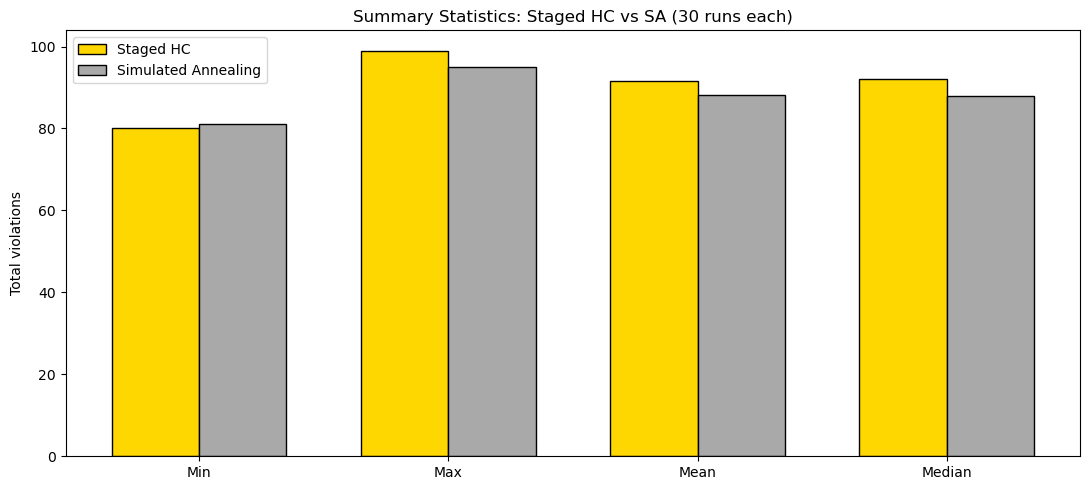

In [35]:
# Compute summary stats for staged HC vs Simulated Annealing
stats = ["Min", "Max", "Mean", "Median"]
hybrid_vals = [
    np.min(hybrid_scores),
    np.max(hybrid_scores),
    np.mean(hybrid_scores),
    np.median(hybrid_scores),
]
sa_vals = [
    np.min(sa_scores),
    np.max(sa_scores),
    np.mean(sa_scores),
    np.median(sa_scores),
]

# Plot bar chart
x = np.arange(len(stats))
w = 0.35  # bar width
plt.figure(figsize=(11,5))
plt.bar(x - w/2, hybrid_vals, width=w, label="Staged HC", color="gold", edgecolor="black")
plt.bar(x + w/2, sa_vals, width=w, label="Simulated Annealing", color="darkgray", edgecolor="black")
plt.xticks(x, stats)
plt.ylabel("Total violations")
plt.title("Summary Statistics: Staged HC vs SA (30 runs each)")
plt.legend()
plt.tight_layout()
plt.show()

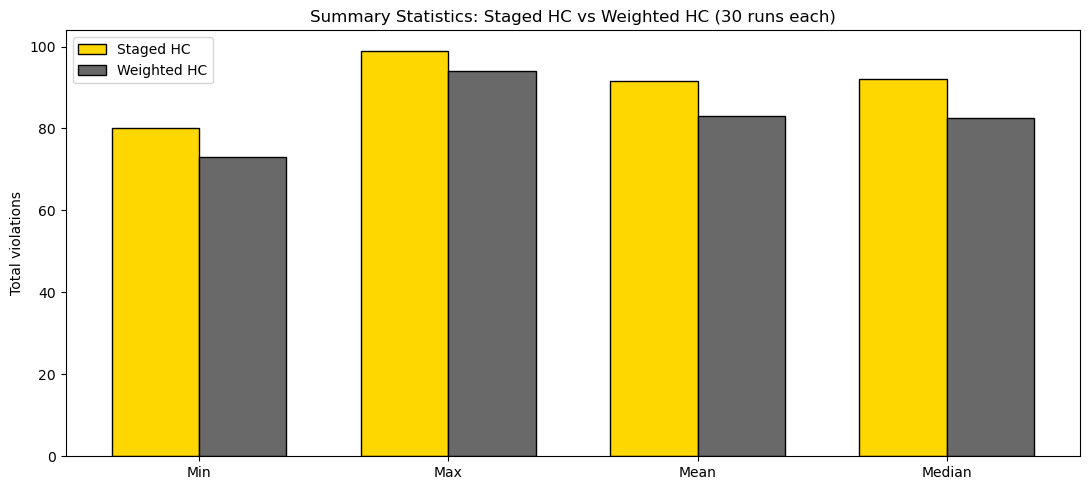

In [36]:
# Summary stats for Hybrid (staged HC) vs Weighted HC
stats = ["Min", "Max", "Mean", "Median"]

hybrid_vals = [
    np.min(hybrid_scores),
    np.max(hybrid_scores),
    np.mean(hybrid_scores),
    np.median(hybrid_scores),
]

# Use raw violation counts for Weighted HC
weighted_vals = [
    np.min(weighted_total_violations),
    np.max(weighted_total_violations),
    np.mean(weighted_total_violations),
    np.median(weighted_total_violations),
]

# Plot bar chart
x = np.arange(len(stats))
w = 0.35
plt.figure(figsize=(11,5))
plt.bar(x - w/2, hybrid_vals, width=w, label="Staged HC", color="gold", edgecolor="black")
plt.bar(x + w/2, weighted_vals, width=w, label="Weighted HC", color="dimgray", edgecolor="black")
plt.xticks(x, stats)
plt.ylabel("Total violations")
plt.title("Summary Statistics: Staged HC vs Weighted HC (30 runs each)")
plt.legend()
plt.tight_layout()
plt.show()

In [37]:
# Load final outcome datasets
assignments_df = pd.read_csv("best_assignment.csv")
spa_violations_df = pd.read_csv("SPA_violation_report.csv")
sm_violations_df = pd.read_csv("second_marker_violation_report.csv")

In [38]:
# Preview first 10 rows of assignments dataset
assignments_df.head(10)

,Student ID,Student Name,Assigned Project ID,Assigned Project Title,Preference Rank,Supervisor ID,Second Marker ID,Forced Second Marker
0,ST1001,S1,P033,PROJECT 33,2.0,PFR130,PFR125,False
1,ST1002,S2,P022,PROJECT 22,1.0,PFR116,PFR112,False
2,ST1003,S3,P008,PROJECT 8,1.0,PFR128,PFR114,False
3,ST1004,S4,P031,PROJECT 31,4.0,PFR108,PFR104,False
4,ST1005,S5,P020,PROJECT 20,1.0,PFR130,PFR116,False
5,ST1006,S6,P032,PROJECT 32,1.0,PFR107,PFR129,False
6,ST1007,S7,P006,PROJECT 6,1.0,PFR129,PFR105,False
7,ST1008,S8,P009,PROJECT 9,1.0,PFR122,PFR117,False
8,ST1009,S9,P012,PROJECT 12,1.0,PFR113,PFR102,False
9,ST1010,S10,P029,PROJECT 29,1.0,PFR104,PFR105,False


In [39]:
# Show info for assignments dataset
assignments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Student ID              100 non-null    object 
 1   Student Name            100 non-null    object 
 2   Assigned Project ID     100 non-null    object 
 3   Assigned Project Title  100 non-null    object 
 4   Preference Rank         95 non-null     float64
 5   Supervisor ID           100 non-null    object 
 6   Second Marker ID        100 non-null    object 
 7   Forced Second Marker    100 non-null    bool   
dtypes: bool(1), float64(1), object(6)
memory usage: 5.7+ KB


In [40]:
# Preview first 10 rows of SPA violations dataset
spa_violations_df.head(10)

,Violation Type,Count
0,average_unmet,2
1,max_students_per_project,0
2,max_students_per_supervisor,0
3,min_students_per_project,0
4,min_students_per_supervisor,0
5,preference_penalty,78
6,prerequisite_unmet,0


In [41]:
# Preview first 10 rows of second marker violations dataset
sm_violations_df.head(10)

,Second Marker Violation Type,Count
0,load_mismatch_before_forced_fill,1
1,inconsistency_after_forced_fill,45
2,total_violations_after_forced_fill,46


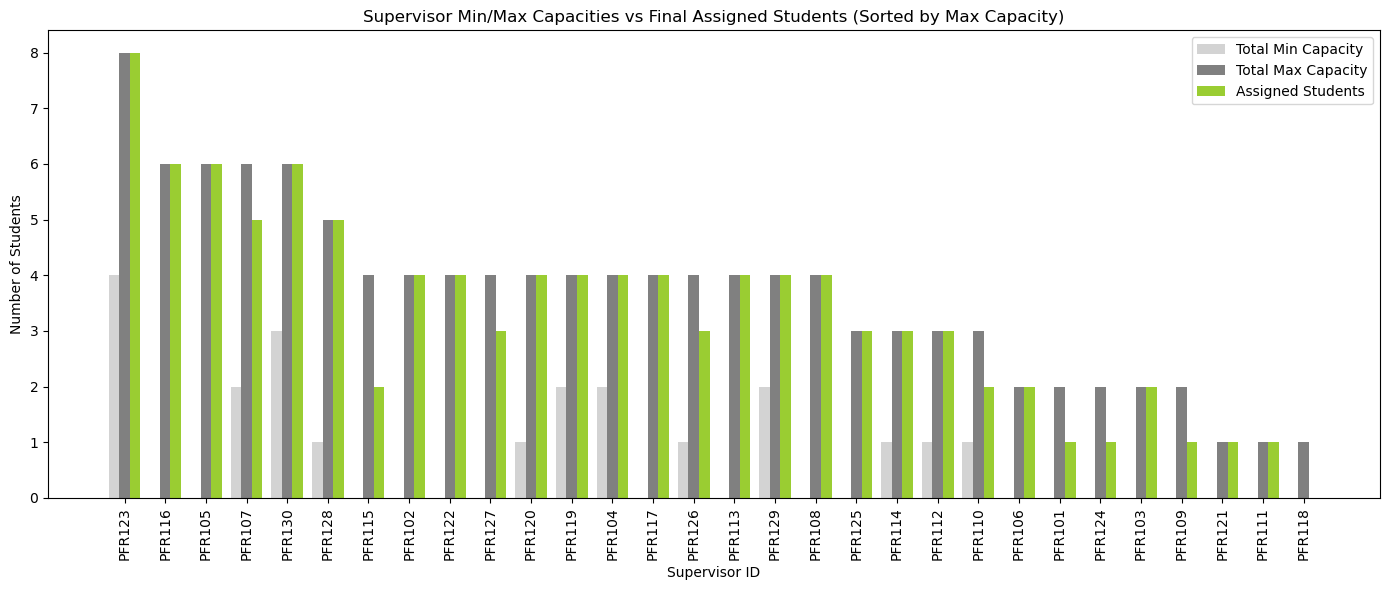

In [42]:
# Calculate each supervisor’s total minimum and maximum capacity
caps = (
    project_df.groupby("Supervisor ID")[["Min No. of Students", "Max No. of Students"]]
    .sum()
    .rename(columns={"Min No. of Students": "Total Min", "Max No. of Students": "Total Max"})
)

# Count how many projects are linked to each supervisor
proj_counts = project_df["Supervisor ID"].value_counts().rename("Project Count")

# Count how many students were finally assigned to each supervisor
assigned_students = (
    assignments_df.groupby("Supervisor ID")["Student ID"]
    .nunique()
    .rename("Assigned Students")
)

# Merge supervisor list with capacities and assignments, filling missing values with zero
agg = (
    supervisor_df[["Supervisor ID"]]
    .merge(caps, on="Supervisor ID", how="left")
    .merge(assigned_students, on="Supervisor ID", how="left")
    .fillna(0)
)

# Convert numeric columns to integers for cleaner plotting
for col in ["Total Min", "Total Max", "Assigned Students"]:
    agg[col] = agg[col].astype(int)

# Sort by max capacity
agg_sorted = agg.sort_values("Total Max", ascending=False).reset_index(drop=True)

# Plot bar chart
x = np.arange(len(agg_sorted))
w = 0.26
fig, ax = plt.subplots(figsize=(14, 6))
ax.bar(x - w, agg_sorted["Total Min"],  width=w, label="Total Min Capacity", color="lightgray")
ax.bar(x,      agg_sorted["Total Max"], width=w, label="Total Max Capacity", color="gray")
ax.bar(x + w,  agg_sorted["Assigned Students"], width=w, label="Assigned Students", color="yellowgreen")
ax.set_xticks(x)
ax.set_xticklabels(agg_sorted["Supervisor ID"], rotation=90)
ax.set_title("Supervisor Min/Max Capacities vs Final Assigned Students (Sorted by Max Capacity)")
ax.set_ylabel("Number of Students")
ax.set_xlabel("Supervisor ID")
ax.legend(loc="upper right")
plt.tight_layout()
plt.show()

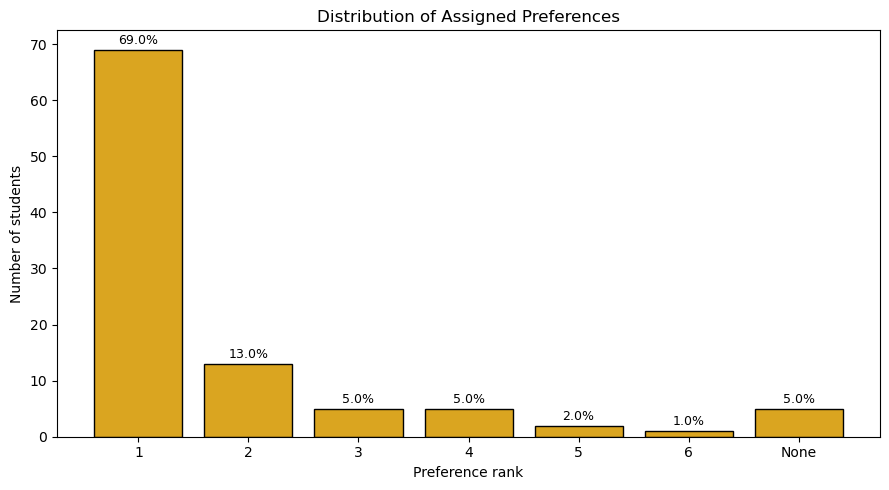

In [43]:
# Build a count table of preference ranks (keep "None" as its own bucket)
pref_raw = assignments_df["Preference Rank"].astype(str).str.strip()
pref_num = pd.to_numeric(pref_raw, errors="coerce")
pref_clean = pref_num.where(pref_raw.ne("None"), other=pd.NA)
counts_num = pref_clean.dropna().astype(int).value_counts().sort_index()
count_none = int(pref_clean.isna().sum())
order = list(counts_num.index.tolist())
data = {"Preference Rank": order, "Count": [int(counts_num.get(r, 0)) for r in order]}
if count_none > 0:
    data["Preference Rank"].append("None")
    data["Count"].append(count_none)
summary = pd.DataFrame(data)
summary["Percentage"] = (summary["Count"] / summary["Count"].sum() * 100).round(1)

# Plot counts and add percentage labels
plt.figure(figsize=(9, 5))
bars = plt.bar(summary["Preference Rank"].astype(str), summary["Count"], color="goldenrod", edgecolor="black")

for bar, pct in zip(bars, summary["Percentage"]):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.5, f"{pct}%", ha="center", va="bottom", fontsize=9)

plt.xlabel("Preference rank")
plt.ylabel("Number of students")
plt.title("Distribution of Assigned Preferences")
plt.tight_layout()
plt.tight_layout()
plt.show()

In [44]:
# Check prerequisite violations across student assignments
import pandas as pd, numpy as np, re
from IPython.display import display, HTML

# Merge assignments with project prerequisites and student grades
wk = (
    assignments_df[["Student ID", "Assigned Project ID", "Supervisor ID"]].copy()
      .merge(project_df[["Project ID", "Pre-requisites"]],
             left_on="Assigned Project ID", right_on="Project ID", how="left")
      .merge(student_df[["Student ID","COURSE001","COURSE002","COURSE003"]],
             on="Student ID", how="left")
)

# Define helper functions to parse and evaluate prerequisite rules
course_cols = ["COURSE001","COURSE002","COURSE003"]

def _tokens(expr: str):
    # Extract course tokens from the prerequisite expression
    return re.findall(r"COURSE\d{3}", expr) if isinstance(expr, str) else []

def eval_prereq(expr: str, row: pd.Series) -> bool:
    # Return True if the student's grades satisfy the rule, otherwise False
    if not isinstance(expr, str) or not expr.strip():
        return True

    e = expr.replace("AND", "and").replace("OR", "or")

    # Replace course tokens with student grades
    for tok in set(_tokens(expr)):
        val = row.get(tok, np.nan)
        try:
            num = float(val)
        except Exception:
            num = np.nan
        e = e.replace(tok, "nan" if pd.isna(num) else str(num))

    # Ensure the expression only contains safe characters
    if not re.fullmatch(r"[0-9\.\s\(\)><=\-+*/andorn]+", e):
        return False

    try:
        return bool(eval(e, {"__builtins__": {}}, {}))
    except Exception:
        return False

# Collect students who did not meet prerequisites
rows = []
for _, r in wk.iterrows():
    rule = r.get("Pre-requisites", None)
    if not isinstance(rule, str) or not rule.strip():
        continue
    if not eval_prereq(rule, r):
        out = {
            "Student ID": r["Student ID"],
            "Project ID": r["Assigned Project ID"],
            "Supervisor ID": r["Supervisor ID"],
            "Project Prerequisites": rule,
            "COURSE001": r.get("COURSE001", np.nan),
            "COURSE002": r.get("COURSE002", np.nan),
            "COURSE003": r.get("COURSE003", np.nan),
        }
        rows.append(out)

prereq_violations_df = pd.DataFrame(rows)

# Display results or confirm zero violations
count = len(prereq_violations_df)
if count == 0:
    print("Prerequisite violations: 0")
else:
    display(HTML(f"<h4>Prerequisite violations: {count}</h4>"))
    cols = ["Student ID","Project ID","Supervisor ID","Project Prerequisites","COURSE001","COURSE002","COURSE003"]
    display(prereq_violations_df[cols].reset_index(drop=True))

Prerequisite violations: 0


In [45]:
# Check average violations where student average falls below project minimum
import pandas as pd
import numpy as np
from IPython.display import display, HTML

# Identify the correct column name for the project's minimum average
PROJECT_MIN_AVG_COL = (
    "Minimum Average Achieved" if "Minimum Average Achieved" in project_df.columns
    else ("Min Average" if "Min Average" in project_df.columns
          else ("Average Achieved" if "Average Achieved" in project_df.columns
                else None))
)
if PROJECT_MIN_AVG_COL is None:
    raise RuntimeError("project_df needs a minimum-average column (e.g. 'Minimum Average Achieved').")

# Merge assignments with project minimum average and student averages
wk = (
    assignments_df[["Student ID", "Assigned Project ID", "Supervisor ID"]].copy()
      .merge(project_df[["Project ID", PROJECT_MIN_AVG_COL]],
             left_on="Assigned Project ID", right_on="Project ID", how="left")
      .merge(student_df[["Student ID", "Average"]],
             on="Student ID", how="left")
)

# Convert averages to numeric in case of string values
wk["Average"] = pd.to_numeric(wk["Average"], errors="coerce")
wk[PROJECT_MIN_AVG_COL] = pd.to_numeric(wk[PROJECT_MIN_AVG_COL], errors="coerce")

# Select only students who fail to meet the required minimum average
viol = wk[
    wk[PROJECT_MIN_AVG_COL].notna() &
    wk["Average"].notna() &
    (wk["Average"] < wk[PROJECT_MIN_AVG_COL])
].copy()

# Build a clean table of violations with the requested fields
avg_violations_df = (
    viol[["Student ID", "Assigned Project ID", "Supervisor ID", PROJECT_MIN_AVG_COL, "Average"]]
      .rename(columns={
          "Assigned Project ID": "Project ID",
          PROJECT_MIN_AVG_COL: "Project Min Average",
          "Average": "Student Average"
      })
      .sort_values(["Project Min Average", "Student Average", "Student ID"],
                   ascending=[False, True, True])
      .reset_index(drop=True)
)

# Display either a confirmation or the violations table
count = len(avg_violations_df)
if count == 0:
    print("Average violations: 0")
else:
    display(HTML(f"<h4>Average violations: {count}</h4>"))
    display(avg_violations_df)

,Student ID,Project ID,Supervisor ID,Project Min Average,Student Average
0,ST1095,P040,PFR108,65,58
1,ST1084,P018,PFR105,60,59


In [46]:
# Ensure forced flag is boolean
assignments_df["Forced Second Marker"] = (
    assignments_df["Forced Second Marker"].astype(str).str.strip().str.lower().isin(["true", "1", "yes"])
)

# Normalise missing second markers
assignments_df["Second Marker ID"] = assignments_df["Second Marker ID"].astype(str).str.strip()
assignments_df.loc[
    assignments_df["Second Marker ID"].isin(["", "none", "nan", "NaN"]),
    "Second Marker ID"
] = pd.NA

# Select rows where second marker is missing or forced
problematic = assignments_df[
    assignments_df["Second Marker ID"].isna() | assignments_df["Forced Second Marker"]
].copy()

# Reset index for display
problematic = problematic.reset_index(drop=True)
problematic.index = problematic.index + 1

print(f"Total problematic cases: {len(problematic)}  "
      f"(missing: {problematic['Second Marker ID'].isna().sum()}, "
      f"forced: {problematic['Forced Second Marker'].sum()})")

display(problematic[[
    "Student ID", "Student Name", "Assigned Project ID",
    "Supervisor ID", "Second Marker ID", "Forced Second Marker"
]])

Total problematic cases: 1  (missing: 0, forced: 1)


,Student ID,Student Name,Assigned Project ID,Supervisor ID,Second Marker ID,Forced Second Marker
1,ST1038,S38,P011,PFR123,PFR124,True


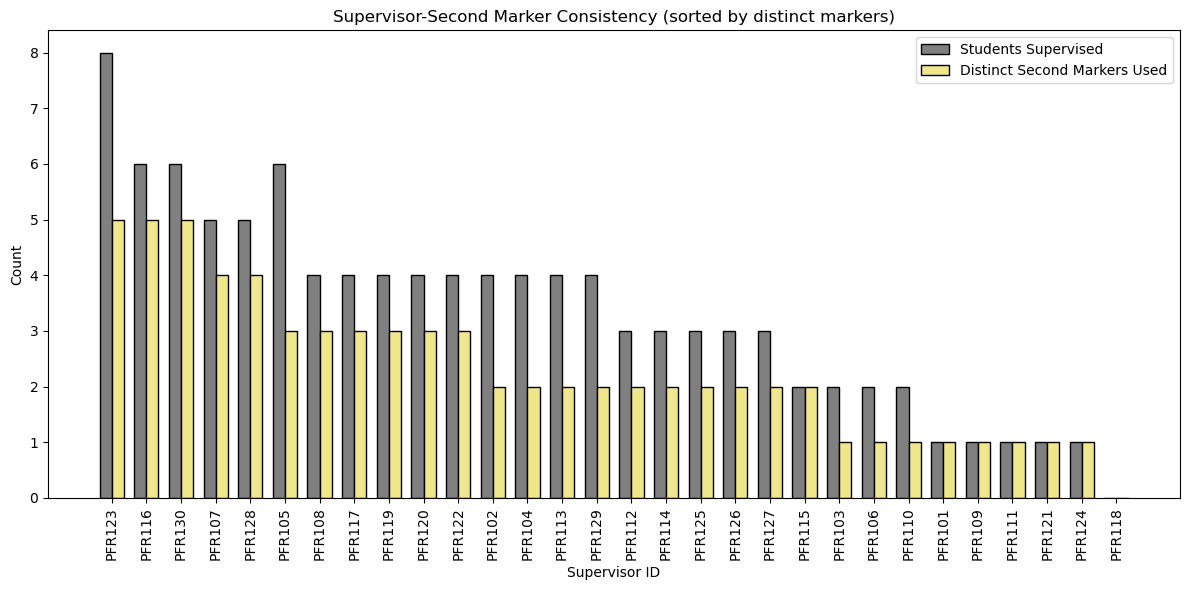

In [47]:
# Build a mapping from supervisor IDs to names (fall back to ID if no name is available
id_col = "Supervisor ID"
possible_name_cols = ["Supervisor Name", "Professor Name", "Name"]
name_col = next((c for c in possible_name_cols if c in supervisor_df.columns), None)

roster_ids = supervisor_df[id_col].astype(str).str.strip()
id_to_name = {
    sid: (str(supervisor_df.loc[i, name_col]).strip() if name_col else sid)
    for i, sid in roster_ids.reset_index(drop=True).items()
}

# Count how many students each supervisor had and how many second markers they used
from collections import Counter, defaultdict
sup_to_counts = defaultdict(Counter)
sup_to_total = Counter()

for _, row in assignments_df.iterrows():
    sup = str(row["Supervisor ID"]).strip() if pd.notna(row["Supervisor ID"]) else "None"
    sm  = str(row["Second Marker ID"]).strip() if pd.notna(row["Second Marker ID"]) else "None"
    if sup != "None":
        sup_to_total[sup] += 1
    if sm != "None":
        sup_to_counts[sup][sm] += 1

# Include all supervisors even if they were not assigned students
all_sids = sorted(roster_ids.unique())

# Collect workload and consistency metrics per supervisor
rows = []
for sup in all_sids:
    total = int(sup_to_total.get(sup, 0))
    cnts = sup_to_counts.get(sup, Counter())
    distinct = int(len(cnts))
    rows.append({
        "Supervisor ID": sup,
        "Supervisor Name": id_to_name.get(sup, sup),
        "Students Supervised": total,
        "Distinct Second Markers Used": distinct,
    })

df_sup_consistency = pd.DataFrame(rows)

# Sort by distinct markers used (desc), then by students supervised (desc)
df_sorted = df_sup_consistency.sort_values(
    ["Distinct Second Markers Used", "Students Supervised"],
    ascending=[False, False]
).reset_index(drop=True)

# Plot grouped bars for workload vs consistency
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,6))
x = np.arange(len(df_sorted))
w = 0.35

ax.bar(x - w/2, df_sorted["Students Supervised"], width=w,
       label="Students Supervised", color="gray", edgecolor="black")
ax.bar(x + w/2, df_sorted["Distinct Second Markers Used"], width=w,
       label="Distinct Second Markers Used", color="khaki", edgecolor="black")

# Format axis labels and legend
ax.set_xticks(x)
ax.set_xticklabels(df_sorted["Supervisor ID"], rotation=90)
ax.set_ylabel("Count")
ax.set_xlabel("Supervisor ID")
ax.set_title("Supervisor-Second Marker Consistency (sorted by distinct markers)")
ax.legend()
plt.tight_layout()
plt.savefig("summary_steht2edats.png", dpi=300, bbox_inches="tight")  # Save as PNG
plt.show()